# Loan Application Status Prediction

# Problem Statement:

The dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

# Objective: 
    
    We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [ ]:
#Importing the necessary Libraries

# linear algebra
import numpy as np 

import warnings
warnings.simplefilter("ignore")

# data processing
import pandas as pd
from pandas_profiling import ProfileReport

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import norm

# Algorithms
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import power_transform

from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV,StratifiedKFold,KFold
from yellowbrick.classifier.rocauc import roc_auc

import pickle
import joblib




```
`# This is formatted as code`
```

# Loading the Dataset

In [ ]:
df=pd.read_csv("loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Remarks: We can see that there are 614 rows and 13 columns in our dataset. In our problem statement we are asked to predict the 'loan status' which is the target label and  the remaining columns are our features making this a Classification problem.

In [ ]:
#checking the dimension of the dataset
df.shape

(614, 13)

# Data Exploration/Analysis

In [ ]:
#checking the first 5 entries of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#checking the last 5 entries of the dataset
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
#checking column names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#checking the datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Remarks: We see that there are 4 columns with float datatype, 1 column with integer datatype and 8 columns with object data type. Later We will separate these columns into numeric and object datatypes for easier analysis.

In [ ]:
#checking for null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Remarks: We see that there are missing values in our dataset. For missing values in categorical columns, we will fill them with mode; and for continuous columns we will fill them with mean.

In [ ]:
#checking unique values
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

Remarks: In the above cell, we can see the number of unique values each columns contains. 

# Feature Engineering

In [ ]:
#getting the list of float data type column names
num_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        num_data.append(x)
print(f"\nContinuous Columns:\n", num_data)

#getting list of object data type column names
obj_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        obj_data.append(x)
print(f"Categorical Columns:\n", obj_data)


Continuous Columns:
 ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical Columns:
 ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
#Filling the missing values in categorical columns with mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

#filling the missing values in continuous columns with mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Remarks: In th above cell, we can see that there are no null values present in the dataset now.

In [ ]:
#dropping the loan_ID column as it is just a list of unique identifiers and is not adding much insight into the prediction of our target label
df.drop("Loan_ID", axis=1, inplace=True)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Statistical Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


Remarks:

count for all the columns are same, so, no data is missing.

mean is greater than median in ApplicantIncome, so data might be right skewed.

std is higher in ApplicantIncome and CoapplicantIncome, so, data might be spreaded.

Large difference between 75th percentile and max is present in ApplicantIncome and CoapplicantIncome. There might be some outliers.

# Exploratory Data Analysis(EDA)



```
# This is formatted as code
```

# Univariate Analysis:

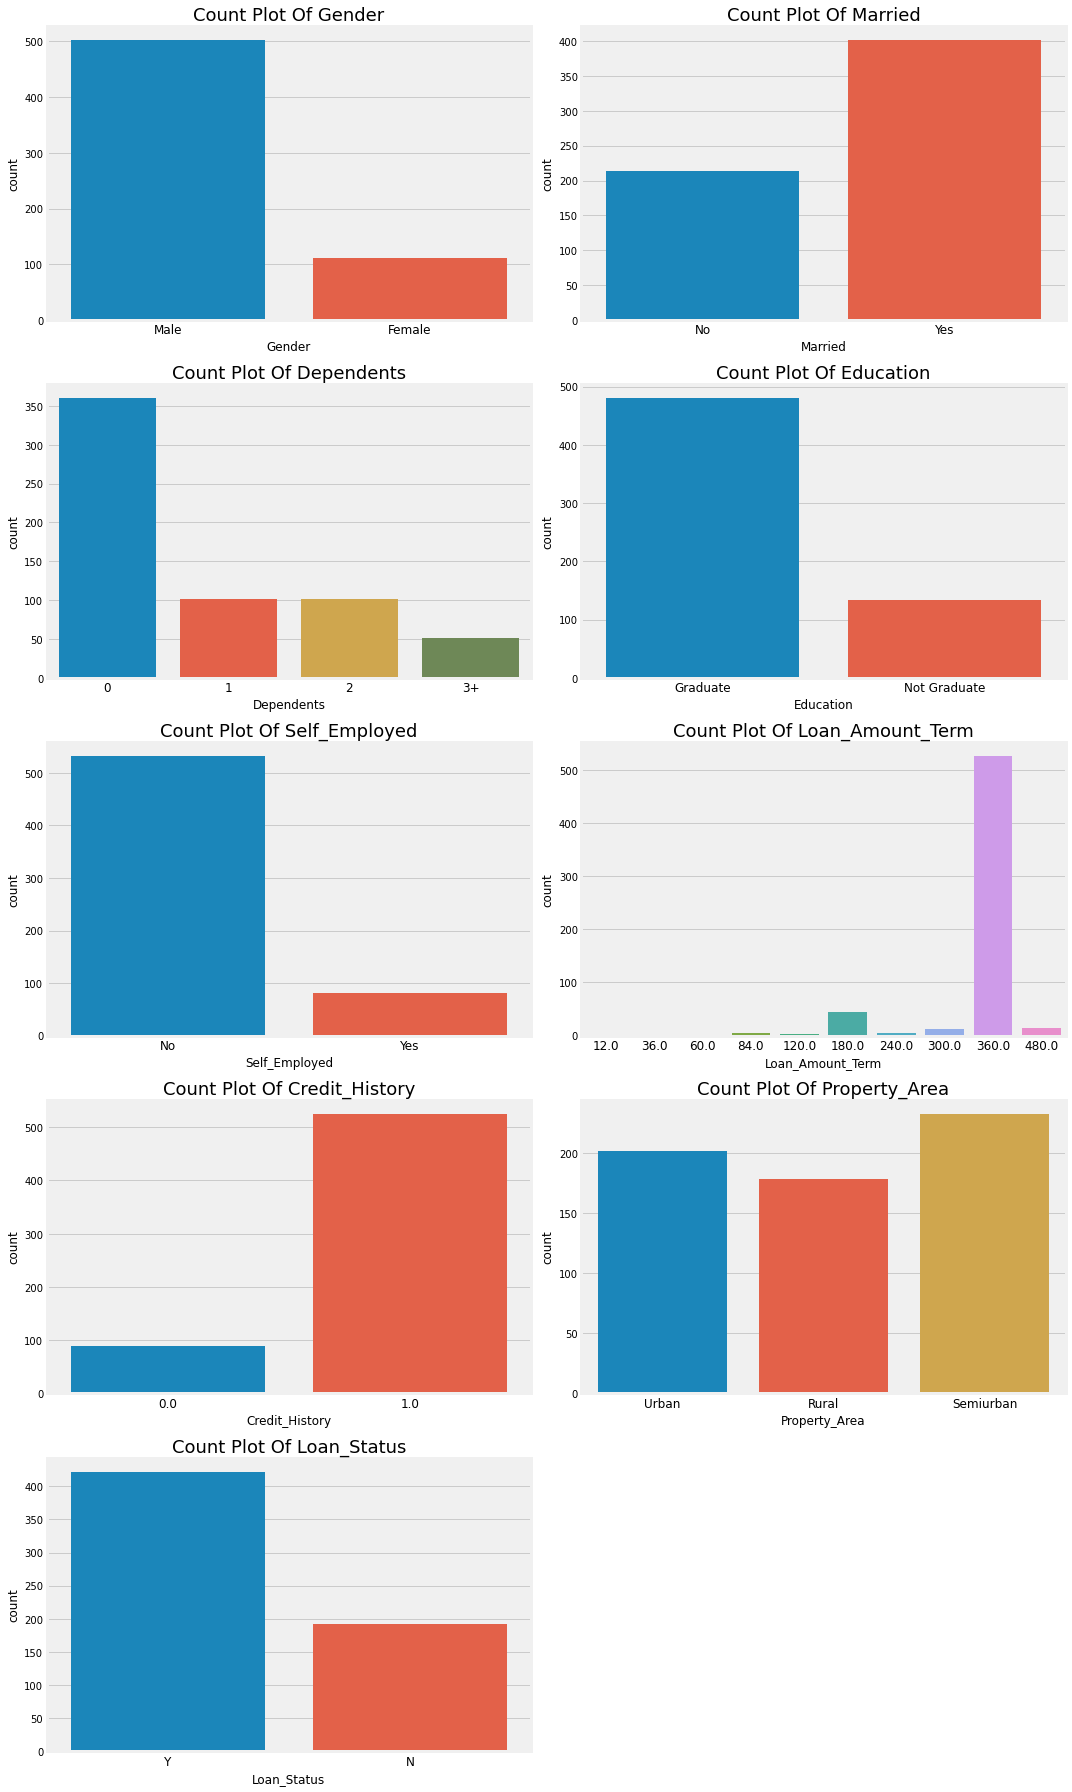

In [ ]:
#Checking the countplots for the feature columns
col0=['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']

#plotting the plots
plt.figure(figsize=(15,25))
for i in range(len(col)):
  plt.subplot(5,2,i+1)
  sns.countplot(df[col[i]])
  plt.title(f"Count Plot Of {col[i]}",fontsize=18)
  plt.xticks(fontsize=12)
  plt.tight_layout()

**Observation**:

1. From Gender, we can say the count of male is higher than female.

2. From married countplot,we can say there are more married people as compared to single.

3. From Countplot of dependents, we can say 0 has highest count and 3+ has the lowest count.

4. The countplot of Education shows that people who are graduated are having more and people who are not graduated have less count.

5. From Countplot of Self_employed, we see that people who are not self employed have high count as compare to self employed people.

6. From countplot of Loan_Amount_Term, 360 has the highest count.

7. Countplot of credit history shows 1 has high count and 0 has less count

8. From Countplot of property area, semi-urban has the highest count followed by Urban , and rural has least count.

9. From Countplot of loan_status, we see that Yes has higher count than NO.

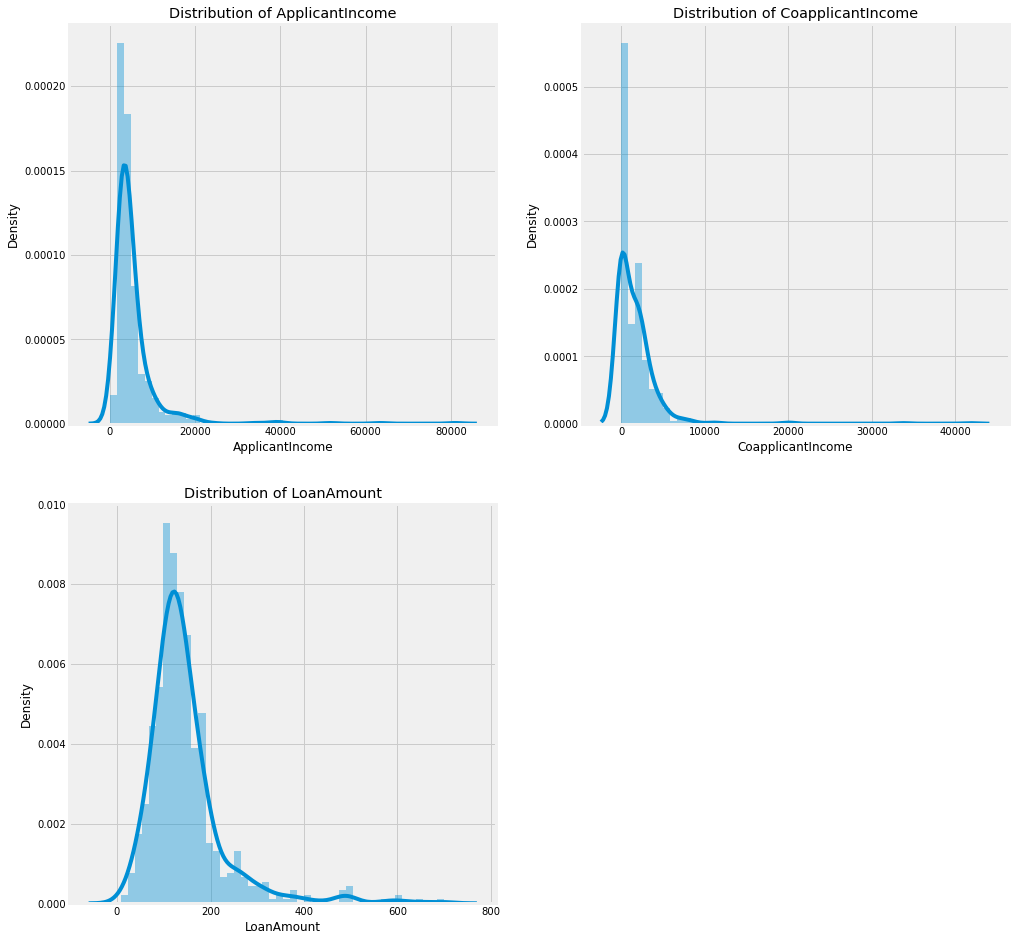

In [ ]:
#Checking distribution plot 
col1=['ApplicantIncome','CoapplicantIncome','LoanAmount']
plt.figure(figsize=(15,25))
for i in range(len(col1)):
  plt.subplot(3,2,i+1)
  sns.distplot(df[col1[i]])
  plt.title(f"Distribution of {col1[i]}")

Observation: From the above distplot, we can see that data has some skewness.

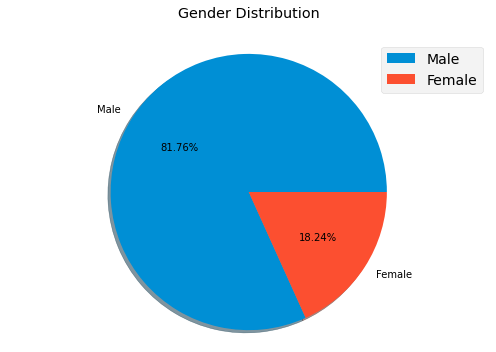

In [ ]:
#checking pie-chart for feature columns
plt.figure(figsize=(7,5))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Gender Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart, we can see that the number of males cover 81.76% of the rows in Gender column while females cover only 18.24% of rows.

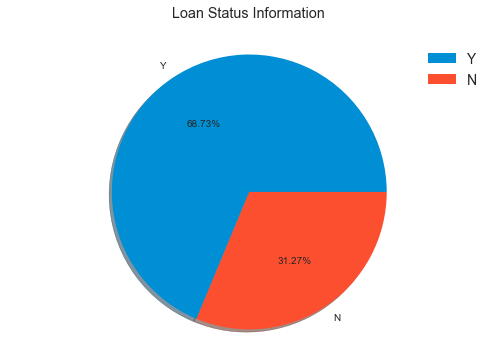

In [ ]:
plt.style.use('seaborn-white')
plt.figure(figsize=(7,5))
plt.pie(df['Loan_Status'].value_counts(), labels=df['Loan_Status'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Loan Status Information\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart we see that our target label has 68.73% of loan approved status while 31.27% of loan rejected status. This indicates a class imbalance that we will treat before building our ML models.

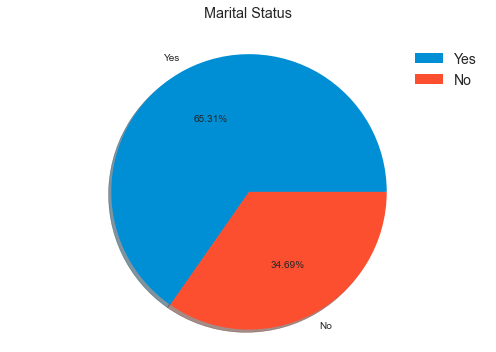

In [ ]:
plt.figure(figsize=(7,5))
plt.pie(df['Married'].value_counts(), labels=df['Married'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Marital Status\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart we can see that  married people occupy 65.31% of rows and the remaining 34.69% of rows are filled with unmarried people.

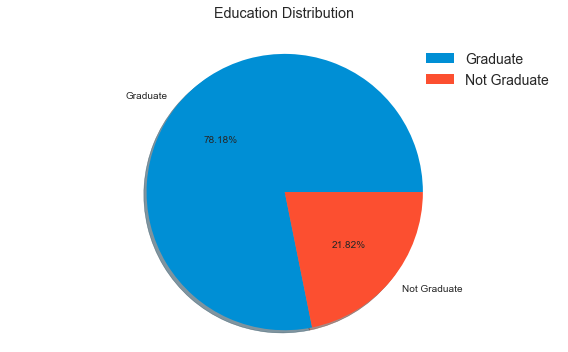

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['Education'].value_counts(), labels=df['Education'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Education Distribution\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: we can see that 78.18% of rows present in Education column are filled with graduates while the remaining 21.82% rows are filled with under graduate people.

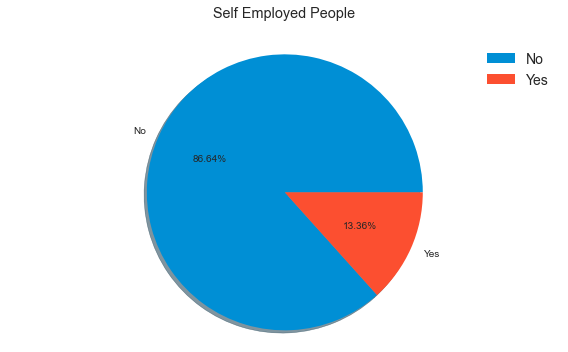

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['Self_Employed'].value_counts(), labels=df['Self_Employed'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Self Employed People\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: we see that 86.64% people are not self employed or might be working with either private or government sectors while only 13.36% people are self employed having their own business.

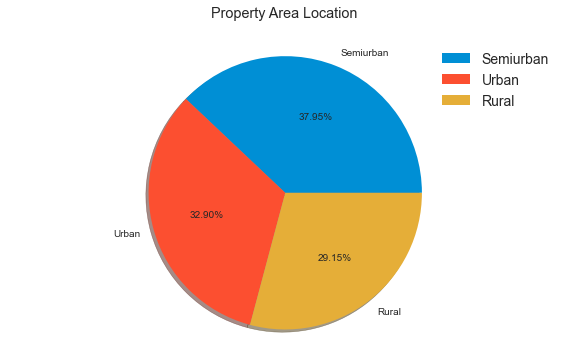

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['Property_Area'].value_counts(), labels=df['Property_Area'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Property Area Location\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: we see from the plot above that 37.95% rows are covered by semi urban area type, 32.90% rows are covered by urban area type and 29.15% rows are covered by rural area type.

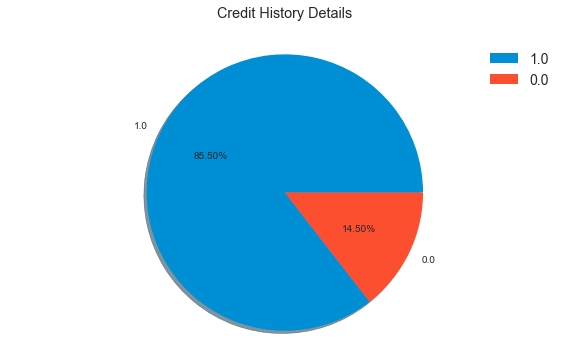

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['Credit_History'].value_counts(), labels=df['Credit_History'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Credit History Details\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: In the above pie chart we observe that 1.0 represent that credit history is available and 0.0 represent that credit history is not available. For 85.50% of people,we have the credit history information available while 14.50% people do not have any credit history.

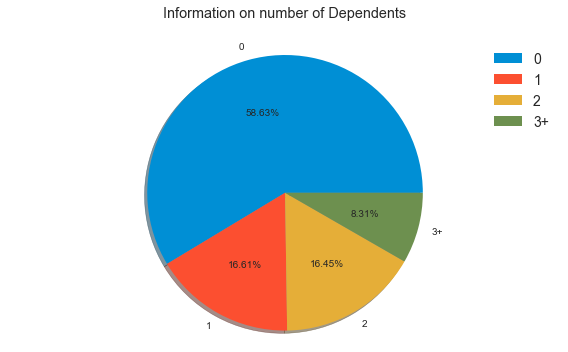

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['Dependents'].value_counts(), labels=df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Information on number of Dependents\n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

Remarks: It shows the total number of dependants where 56.63% rows are covered with people having 0 dependents, 16.61% rows covered with people having 1 dependent, 16.45% rows covered with people having 2 dependents and 8.31% rows covered with people having 3 or more dependents.

# Bivariate Analysis:

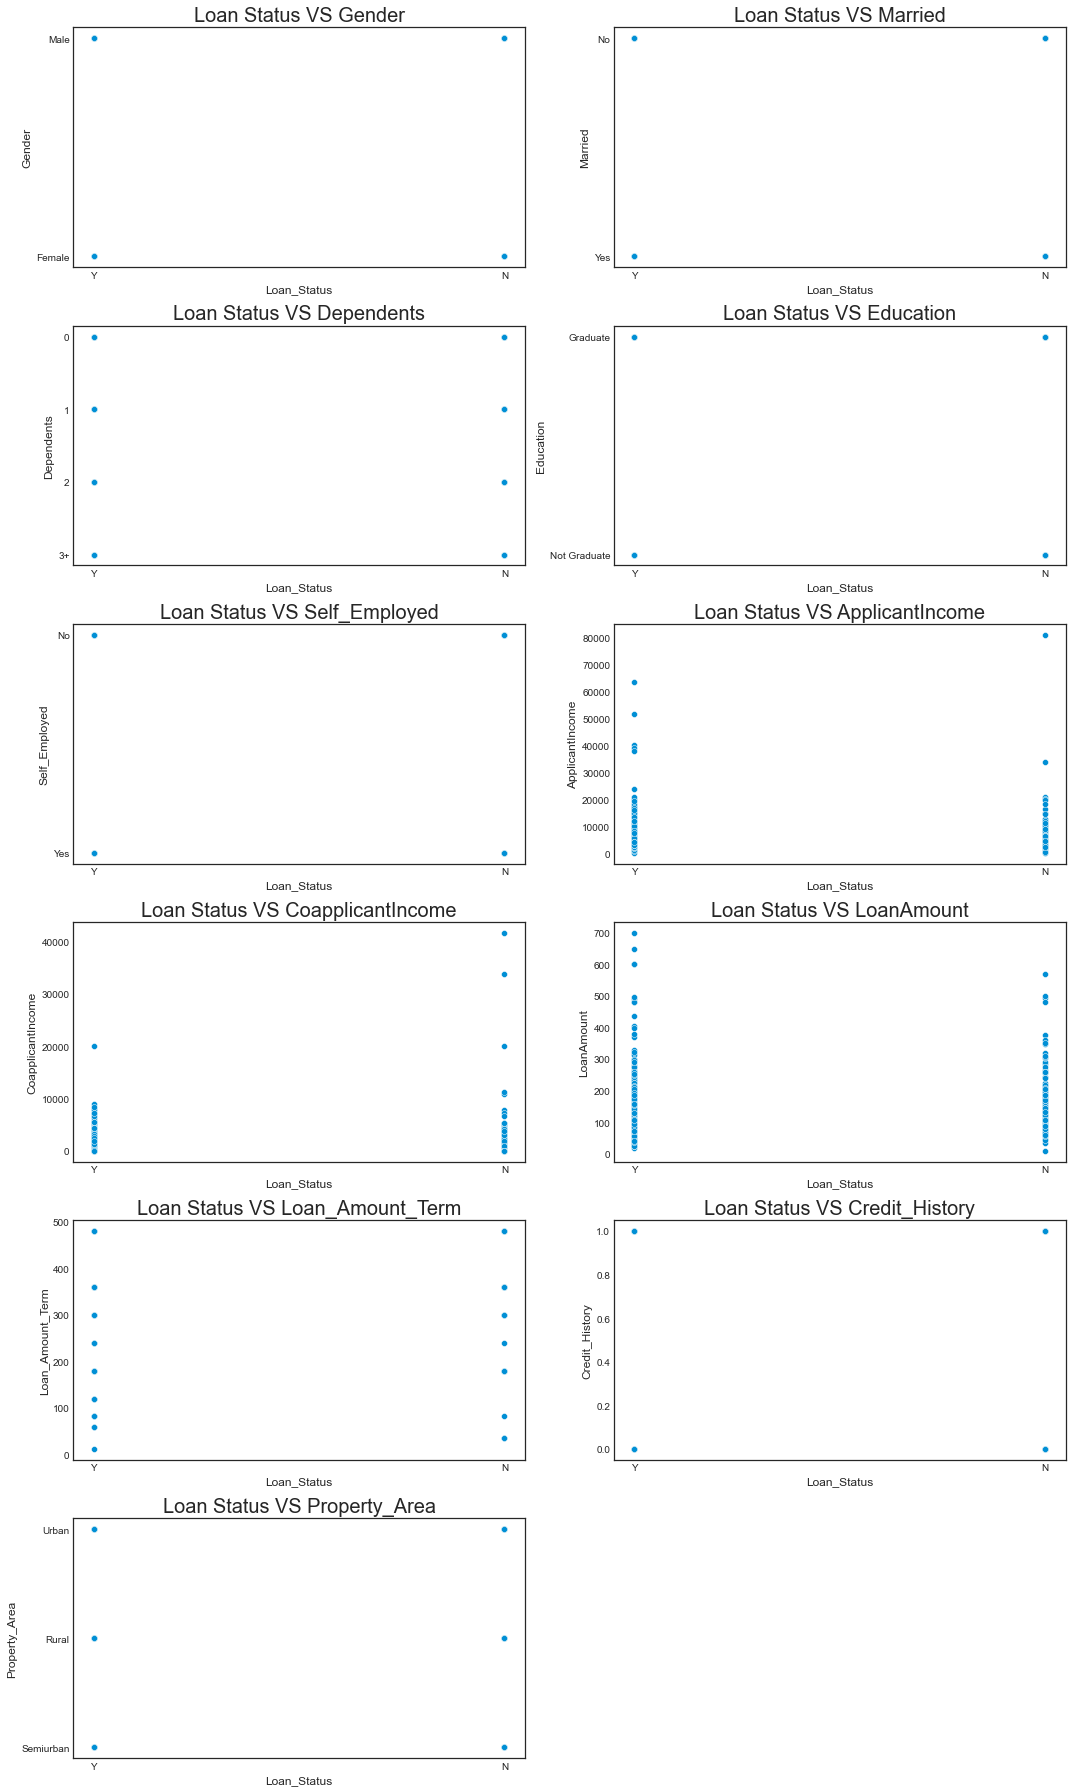

In [ ]:
#checking the relationship between target column and other feature columns using scatterplot
col2=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

plt.figure(figsize=(15,25))
for i in range(len(col2)):
  plt.subplot(6,2,i+1)
  sns.scatterplot(x=df['Loan_Status'],y=df[col2[i]])
  plt.title(f"Loan Status VS {col2[i]}",fontsize=20)
  plt.tight_layout()

Observation:

1. From applicantincome and loan status, we see that people whose income is high take less loan and people earning less take more loans.

2. From coapplicantincome We can say there are more the people who dont want loan.

3. From loanamount we can say people with loan status Yes are high as compared to No loan.

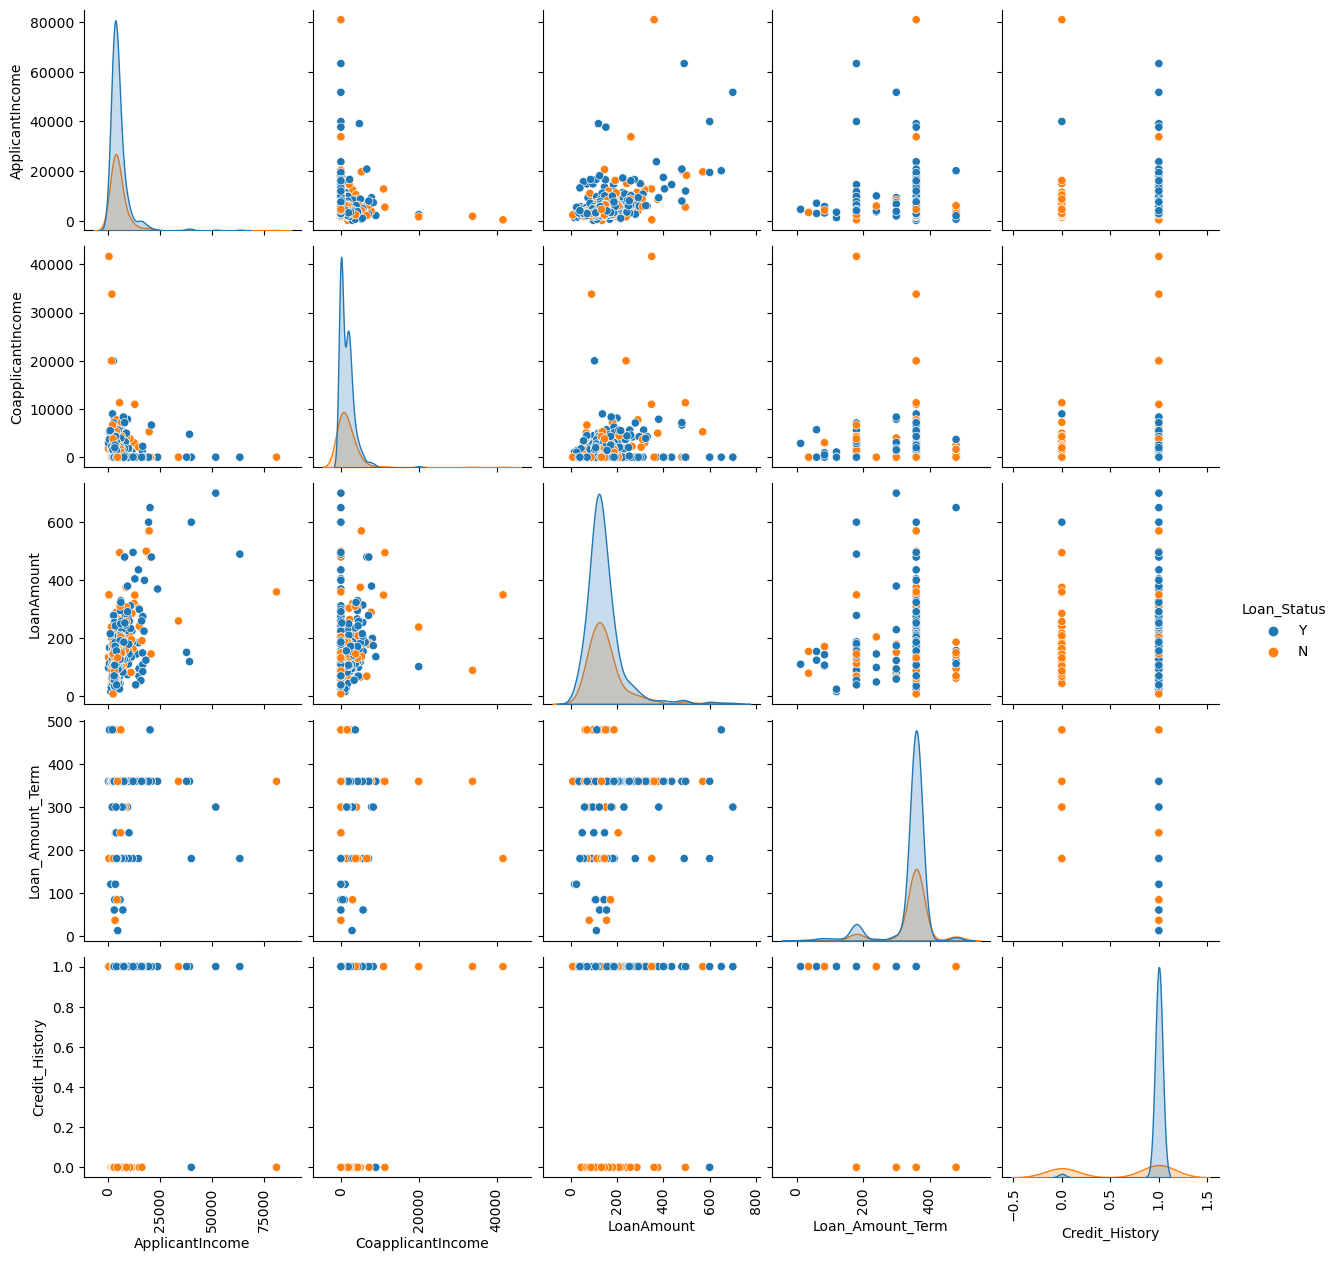

In [ ]:
#Checking pairplot
plt.style.use('default')
g = sns.pairplot(df, hue='Loan_Status', diag_kind='kde')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

Observation: Here we have generated the above pairplot for our continous data columns that shows us how the data points are distributed in each of the numeric datatype columns.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

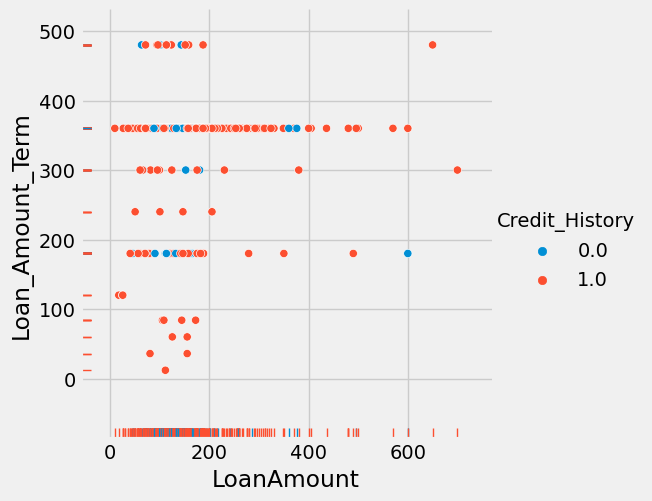

In [ ]:
plt.style.use('fivethirtyeight')
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Credit_History', legend=False)

Remarks: In the above plot we can see that in loan amount vs loan amount term data, most of the values already have a credit history to showcase.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

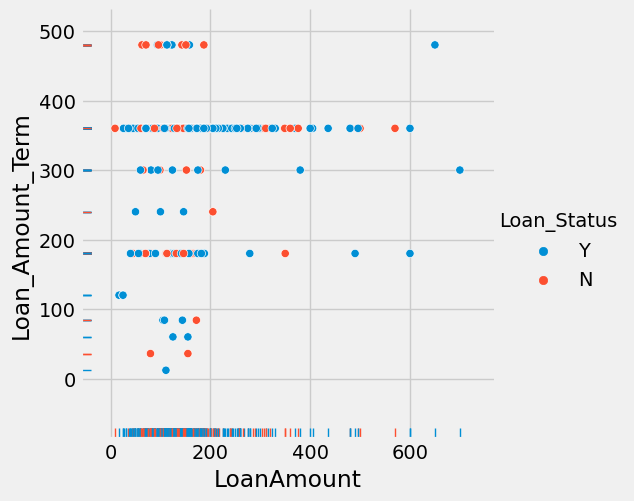

In [ ]:
sns.relplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='Loan_Amount_Term', hue='Loan_Status', legend=False)

Remarks: In the above loan amount vs loan amount term plot, we see that most of the data points are accumulated for 180, 300, 340, 360 and 480 terms while loan amount ranging from 50-250 for a term of 480 mostly seems to be getting rejected than approved.

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

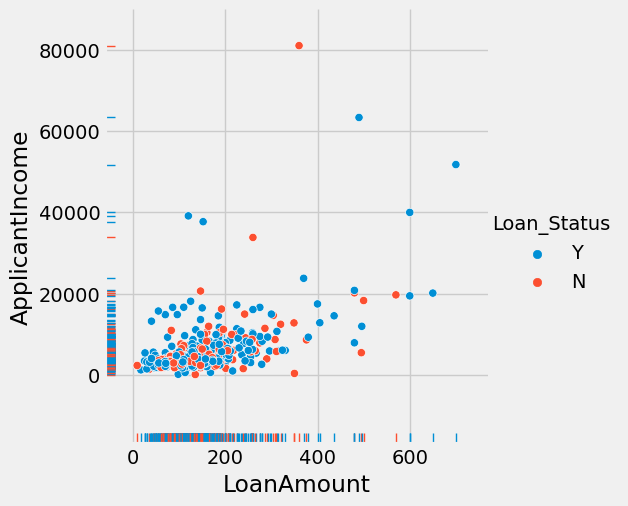

In [ ]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', legend=False)

Remarks: Here we can see that most of the data points are converged near the range 0-20000 data for Applicant Income for loan amount between 0-400

<AxesSubplot:xlabel='LoanAmount', ylabel='ApplicantIncome'>

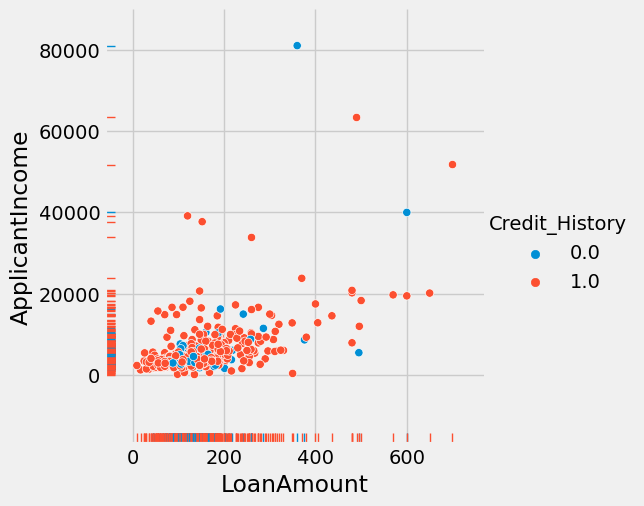

In [ ]:
sns.relplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='ApplicantIncome', hue='Credit_History', legend=False)

Remarks: Here we see that most of the data points have their credit history available and the values are converged between 0-20000 for applicant income and 0-400 for loan amount data.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

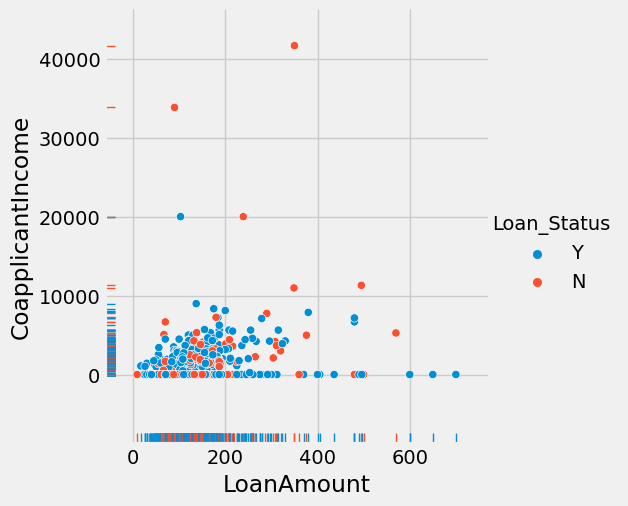

In [ ]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Loan_Status', legend=False)

Remarks: Here we see the co-applicant income vs loan amount data points where co-applicants with higher income are mostly denied loan where most data values are converged between 0-10000 for co-applicant income and 0-300 for loan amount data.

<AxesSubplot:xlabel='LoanAmount', ylabel='CoapplicantIncome'>

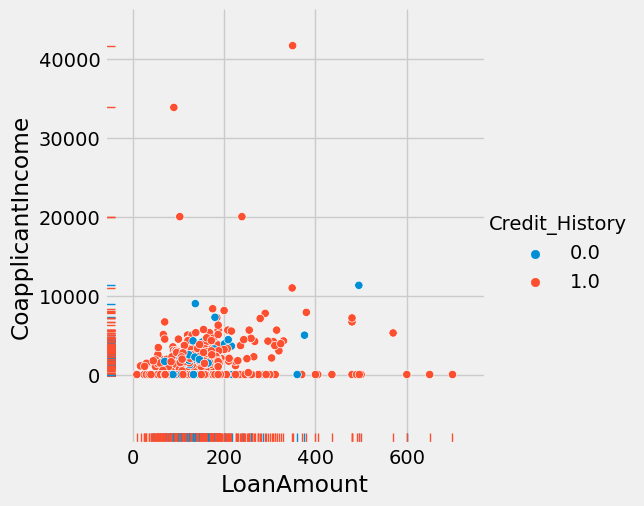

In [ ]:
sns.relplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History')
sns.rugplot(data=df, x='LoanAmount', y='CoapplicantIncome', hue='Credit_History', legend=False)

Remarks: From the above plot, we can see that most of the data points are accumulated between 0-10000 for co applicant income and 0-350 for loan amount data and most of these data points have a credit history available for them.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

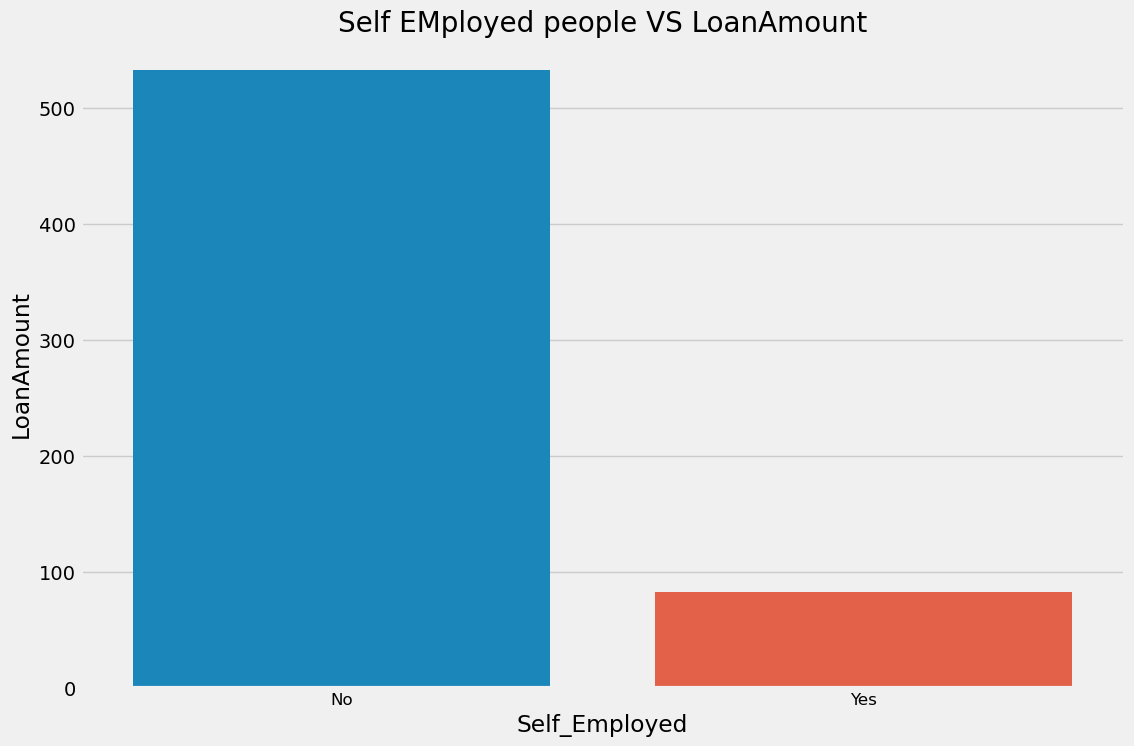

In [ ]:
#Checking barplot
df1=df.groupby('Self_Employed')['LoanAmount'].count()
df1=df1.reset_index()
df1=df1.sort_values(by=('LoanAmount'),ascending=False)

plt.figure(figsize=(12,8))
plt.title("Self EMployed people VS LoanAmount",fontsize=20)
sns.barplot(x='Self_Employed',y='LoanAmount',data=df1)
plt.xticks(fontsize=12)

Remarks: Here we can see that people who are Not self-employed are taking loans of more amount than those who are self-employed.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '12.0'),
  Text(1, 0, '36.0'),
  Text(2, 0, '60.0'),
  Text(3, 0, '84.0'),
  Text(4, 0, '120.0'),
  Text(5, 0, '180.0'),
  Text(6, 0, '240.0'),
  Text(7, 0, '300.0'),
  Text(8, 0, '360.0'),
  Text(9, 0, '480.0')])

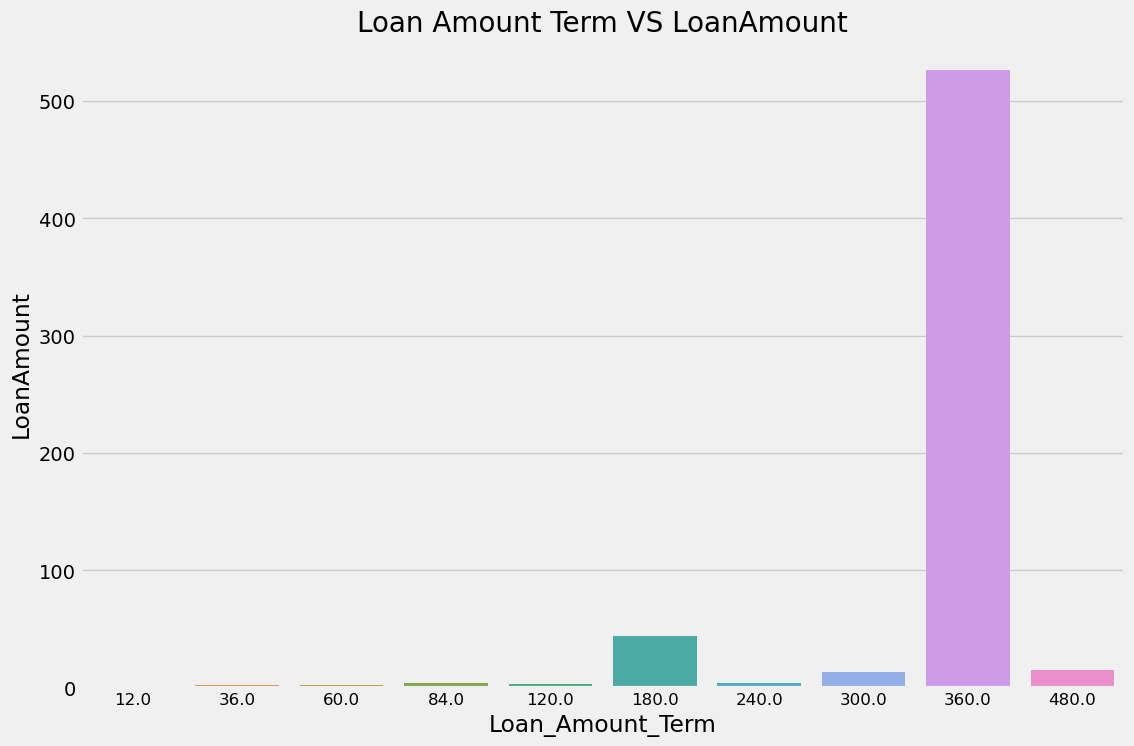

In [ ]:
df2=df.groupby('Loan_Amount_Term')['LoanAmount'].count()
df2=df2.reset_index()
df2=df2.sort_values(by=('LoanAmount'),ascending=False)

plt.figure(figsize=(12,8))
plt.title("Loan Amount Term VS LoanAmount",fontsize=20)
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=df2)
plt.xticks(fontsize=12)

Remarks: In the above plot we can see that the highest number of rows are covered by the value 360.0 in the "Loan_Amount_Term" column.

Text(0.5, 1.0, 'AREA VS Loan Amount')

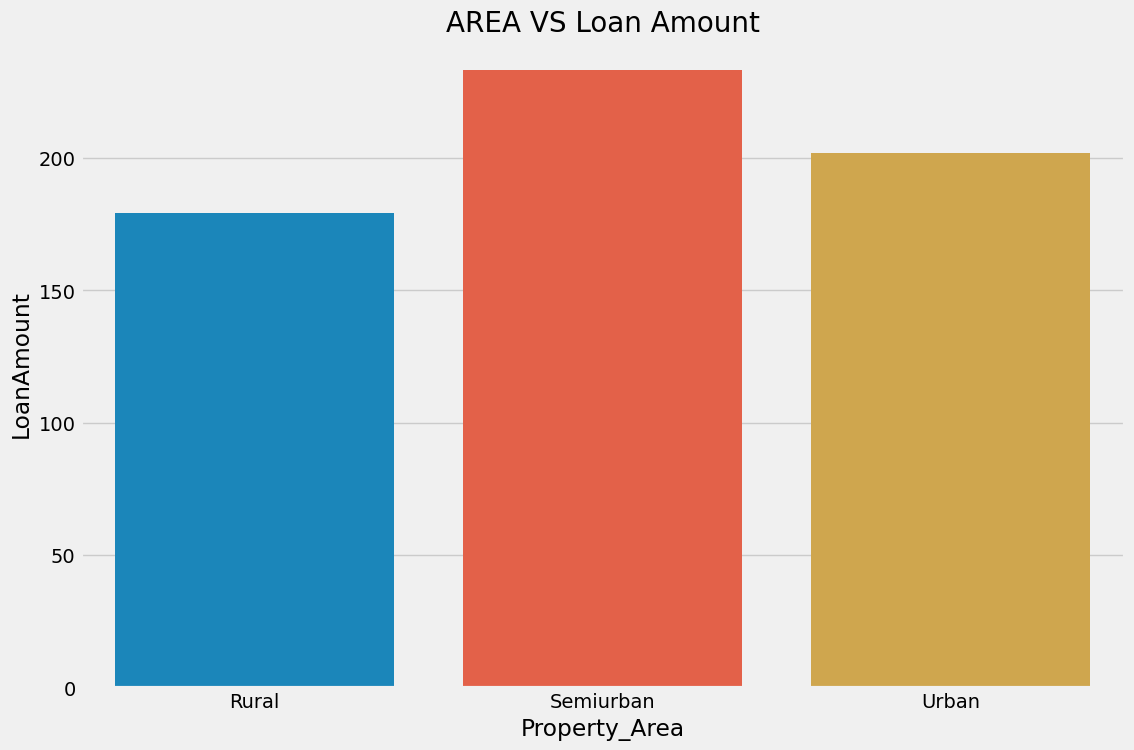

In [ ]:
df3=df.groupby('Property_Area')['LoanAmount'].count()
df3=df3.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Property_Area',y='LoanAmount',data=df3)
plt.title("AREA VS Loan Amount",fontsize=20)

Remarks: From the above plot, we can say people from semiurban take more loan than rural and urban.

<AxesSubplot:title={'center':'Loanamount VS CoapplicantIncome'}, xlabel='CoapplicantIncome', ylabel='LoanAmount'>

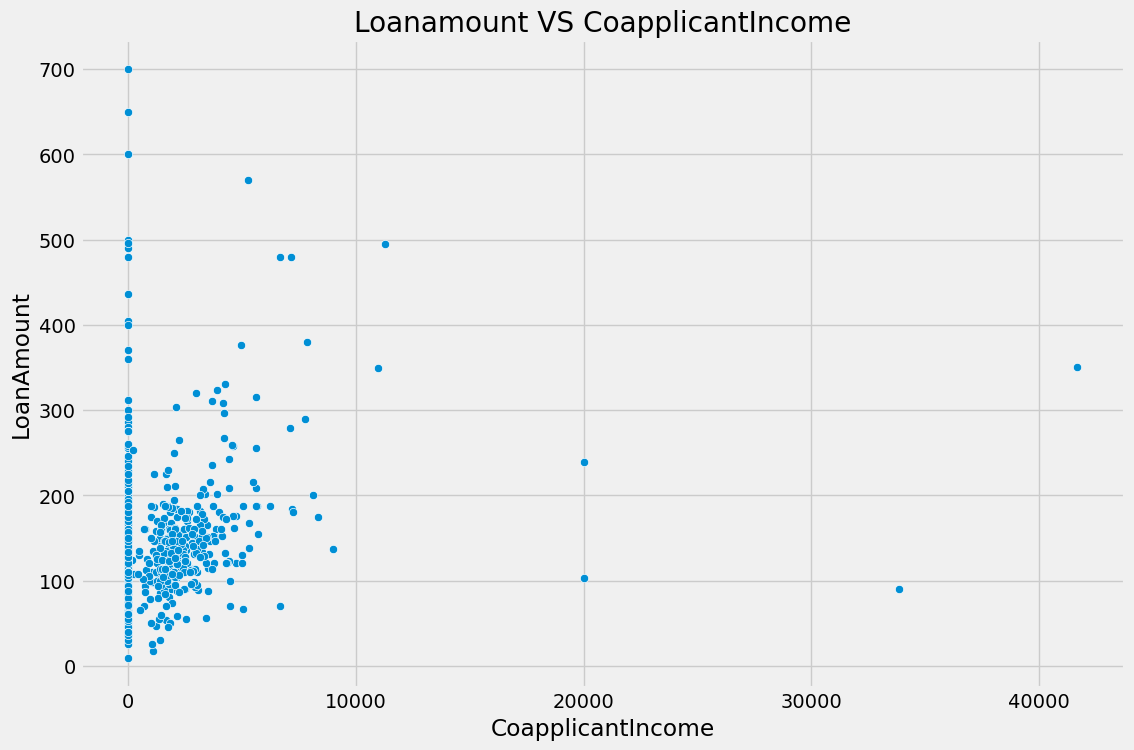

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Loanamount VS CoapplicantIncome")
sns.scatterplot(y='LoanAmount',x='CoapplicantIncome',data=df)

Remarks: From the above plot, we see that people who have income between 0-10000 takes more loan and people who have income more then 10000 took almost no loan.

In [ ]:
#splitting the data into separate groups
df4=df.groupby('Dependents')['LoanAmount'].apply(lambda x:x.mean())
df4=df4.reset_index()
df4=df4.sort_values(by=('LoanAmount'),ascending=False)

df5=df.groupby('Dependents')['CoapplicantIncome'].apply(lambda x:x.mean())
df5=df5.reset_index()
df5=df5.sort_values(by=('CoapplicantIncome'),ascending=False)

df6=df.groupby('Property_Area')['CoapplicantIncome'].apply(lambda x:x.mean())
df6=df6.reset_index()
df6=df6.sort_values(by=('CoapplicantIncome'),ascending=False)

df7=df.groupby('Property_Area')['LoanAmount'].apply(lambda x:x.mean())
df7=df7.reset_index()
df7=df7.sort_values(by=('LoanAmount'),ascending=False)

df8=df.groupby('Gender')['CoapplicantIncome'].apply(lambda x:x.mean())
df8=df8.reset_index()
df8=df8.sort_values(by=('Gender'),ascending=False)

df9=df.groupby('Gender')['LoanAmount'].apply(lambda x:x.mean())
df9=df9.reset_index()
df9=df9.sort_values(by=('Gender'),ascending=False)

df10=df.groupby('Married')['CoapplicantIncome'].apply(lambda x:x.mean())
df10=df10.reset_index()
df10=df10.sort_values(by=('Married'),ascending=False)

df11=df.groupby('Married')['LoanAmount'].apply(lambda x:x.mean())
df11=df11.reset_index()
df11=df11.sort_values(by=('Married'),ascending=False)

df12=df.groupby('Education')['CoapplicantIncome'].apply(lambda x:x.mean())
df12=df12.reset_index()
df12=df12.sort_values(by=('Education'),ascending=False)

df13=df.groupby('Education')['LoanAmount'].apply(lambda x:x.mean())
df13=df13.reset_index()
df13=df13.sort_values(by=('Education'),ascending=False)

df14=df.groupby('Self_Employed')['CoapplicantIncome'].apply(lambda x:x.mean())
df14=df14.reset_index()
df14=df14.sort_values(by=('Self_Employed'),ascending=False)

df15=df.groupby('Self_Employed')['LoanAmount'].apply(lambda x:x.mean())
df15=df15.reset_index()
df15=df15.sort_values(by=('Self_Employed'),ascending=False)

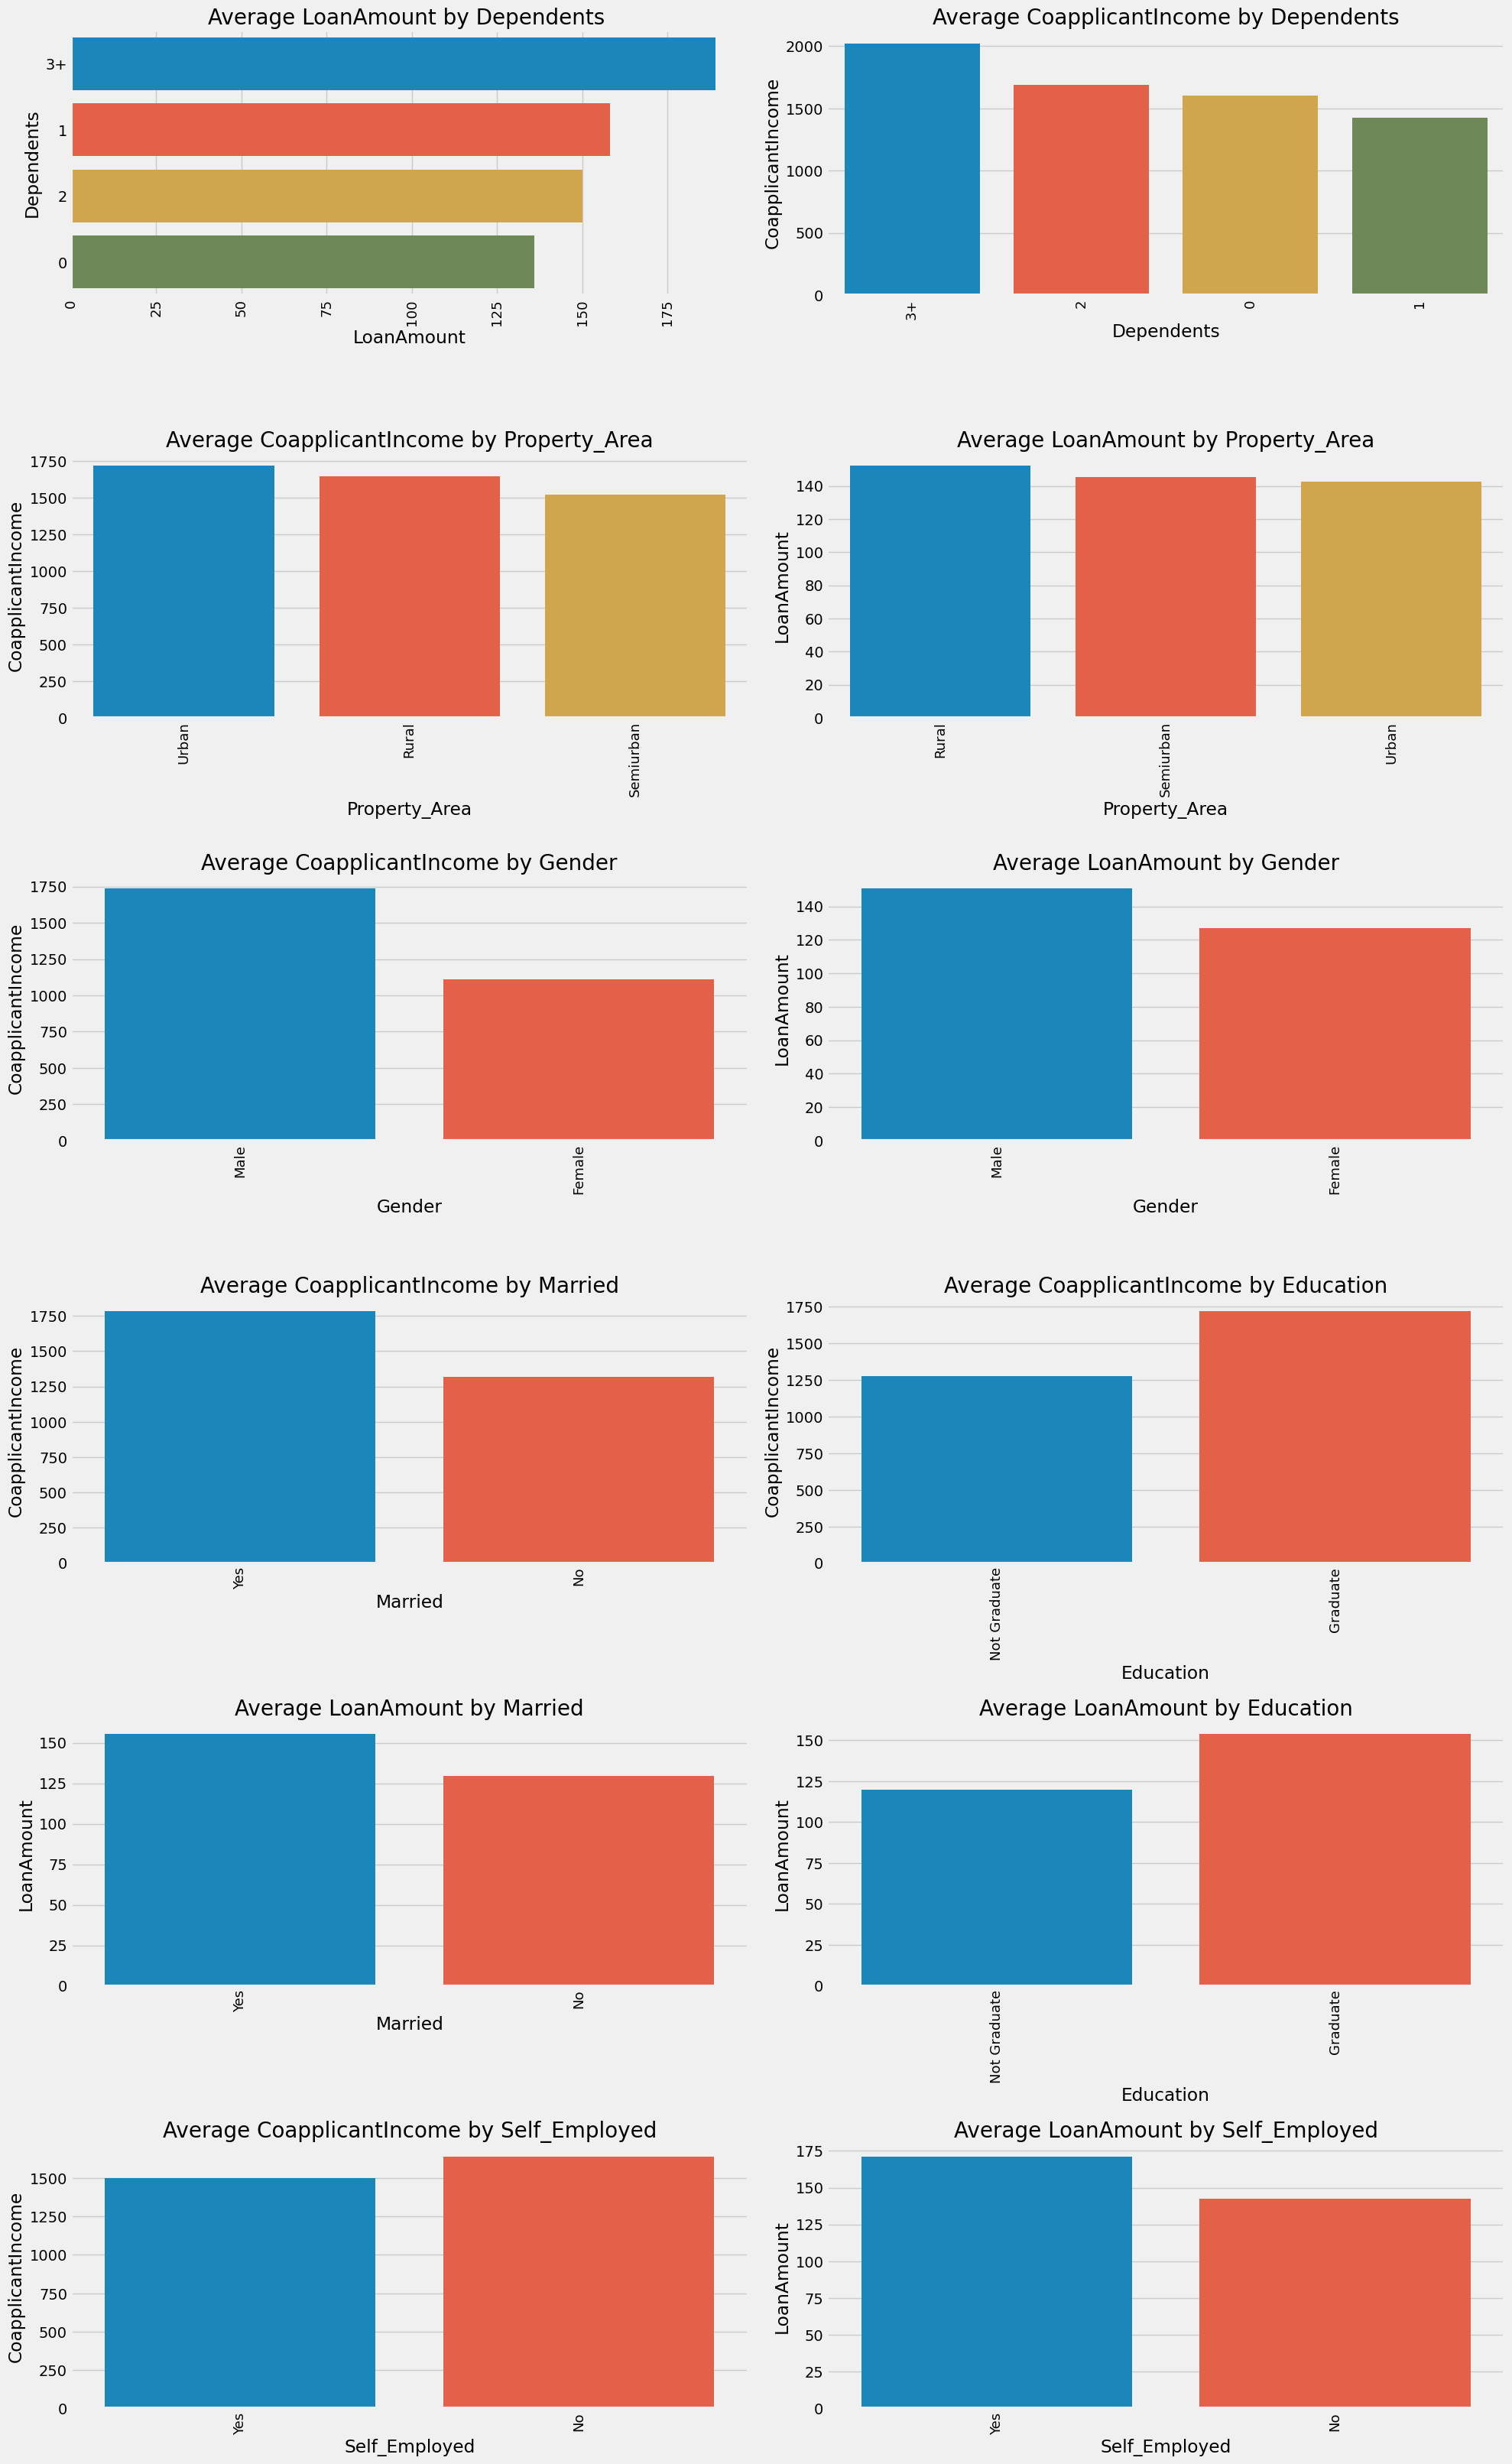

In [ ]:
#Plotting barplots for the data splitted into groups
plt.figure(figsize=(20,65))
plt.subplot(12,2,1)
sns.barplot(y='Dependents',x='LoanAmount',data=df4.head(20))
plt.title("Average LoanAmount by Dependents ",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,2)
sns.barplot(x='Dependents',y='CoapplicantIncome',data=df5.head(20))
plt.title("Average CoapplicantIncome by Dependents",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,3)
sns.barplot(x='Property_Area',y='CoapplicantIncome',data=df6.head(20))
plt.title("Average CoapplicantIncome by Property_Area",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,4)
sns.barplot(x='Property_Area',y='LoanAmount',data=df7.head(20))
plt.title("Average LoanAmount by Property_Area",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,5)
sns.barplot(x='Gender',y='CoapplicantIncome',data=df8.head(20))
plt.title("Average CoapplicantIncome by Gender",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,6)
sns.barplot(x='Gender',y='LoanAmount',data=df9.head(20))
plt.title("Average LoanAmount by Gender",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,7)
sns.barplot(x='Married',y='CoapplicantIncome',data=df10.head(20))
plt.title("Average CoapplicantIncome by Married",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,8)
sns.barplot(x='Education',y='CoapplicantIncome',data=df12.head(20))
plt.title("Average CoapplicantIncome by Education",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,9)
sns.barplot(x='Married',y='LoanAmount',data=df11.head(20))
plt.title("Average LoanAmount by Married",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,10)
sns.barplot(x='Education',y='LoanAmount',data=df13.head(20))
plt.title("Average LoanAmount by Education",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,11)
sns.barplot(x='Self_Employed',y='CoapplicantIncome',data=df14.head(20))
plt.title("Average CoapplicantIncome by Self_Employed",fontsize=20)
plt.xticks(rotation=90,fontsize=13)
plt.subplot(12,2,12)
sns.barplot(x='Self_Employed',y='LoanAmount',data=df15.head(20))
plt.xticks(rotation=90,fontsize=13)
plt.title("Average LoanAmount by Self_Employed",fontsize=20)
plt.tight_layout()

Remarks:

From the above plots, we can easily see the average value related to loanamount, coapplicantincome, and applicantincome with all the features in dataset

# Encoding:

Here we are using ordianalencoder since all the columns have values in order.

In [ ]:
oe=OrdinalEncoder()
def ordinal_transform(df,column):
  df[column]=oe.fit_transform(df[column])
  return df

In [ ]:
df=ordinal_transform(df,['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [ ]:
df['Dependents']=df['Dependents'].replace({'3+':'3'})

In [ ]:
df['Dependents']=df['Dependents'].astype(int)

In [ ]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [ ]:
x=X

# Checking Outliers:

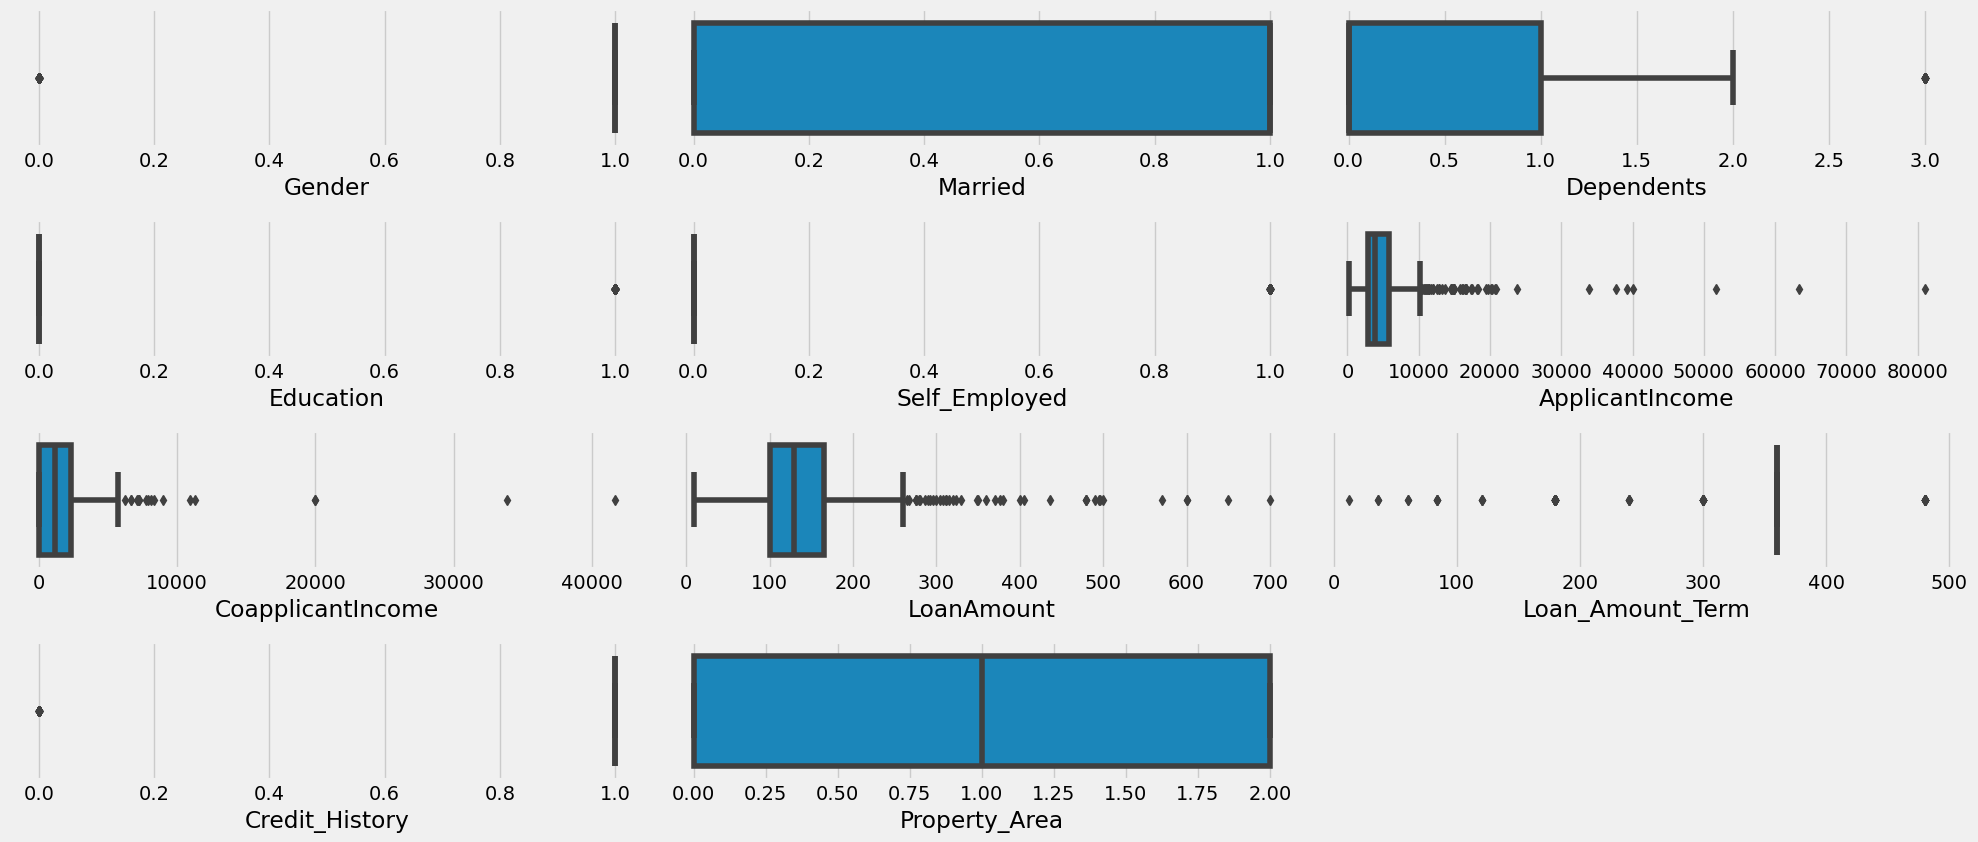

In [ ]:
#checking outliers using boxplot
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: We can see from the above plots that there are many outliers present.

# Removing Outliers:

In [ ]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col] <=percentile[0]]=percentile[0]
  X[col][X[col] >=percentile[1]]=percentile[1]

Remarks: Here we used the percentile method to remove outliers without losing any data.

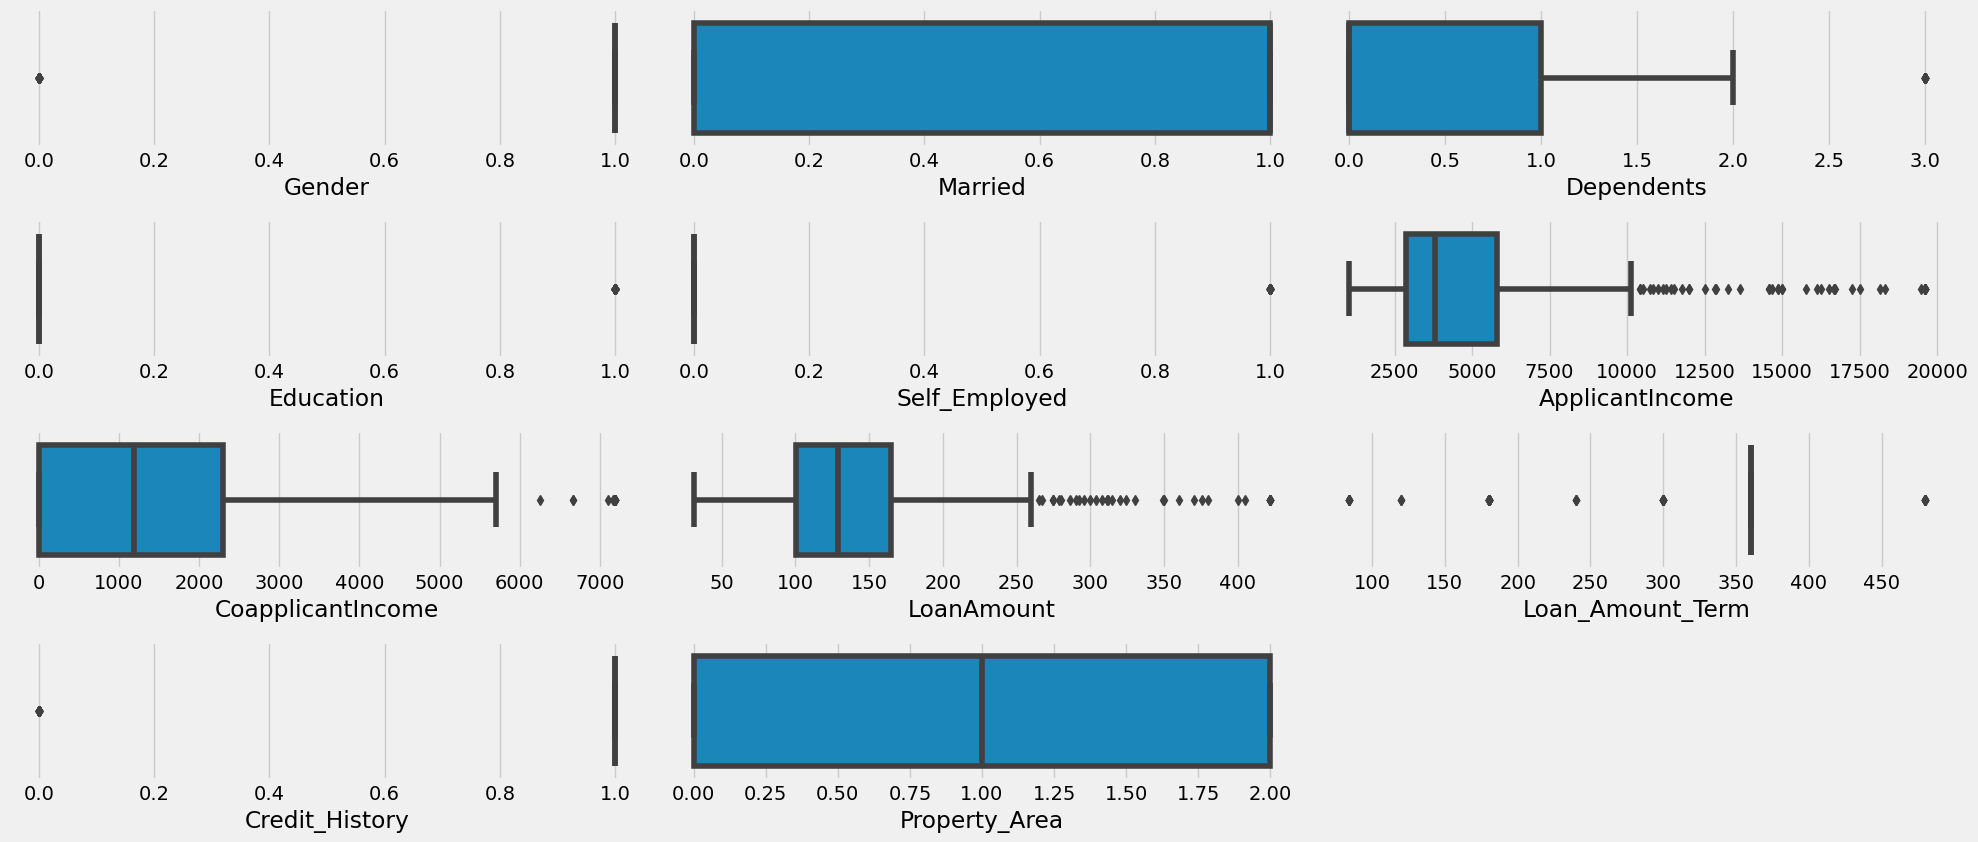

In [ ]:
#checking outliers after removal
X_val=X.columns.values
plt.figure(figsize=(20,25))
for i in range(0,len(X_val)):
  plt.subplot(12,3,i+1)
  sns.boxplot(X[X_val[i]])
  plt.tight_layout()

Remarks: We can see that many outliers are removed.

# Multivariate Analysis:

<AxesSubplot:>

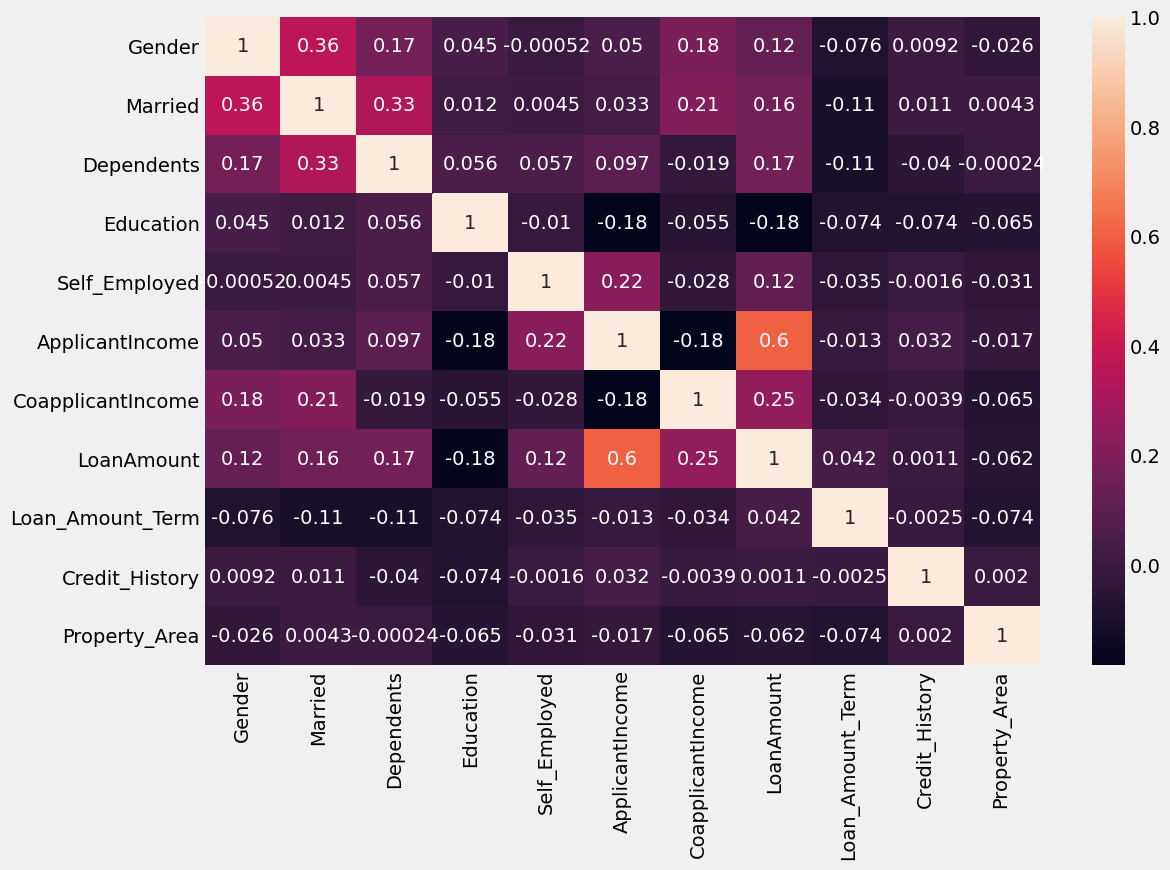

In [ ]:
#Checking correlation with the help of heatmap
plt.figure(figsize=(12,8))
X_corr=X.corr()
sns.heatmap(X_corr,annot=True)

Observation: From heatmap above we see that there are some columns that have good correlation like applicantincome, loanamount,married and there are some columns that have less correlation.

# Balancing the data:

In [ ]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Loan_Status'])

Text(0.5, 1.0, 'Balanced Data')

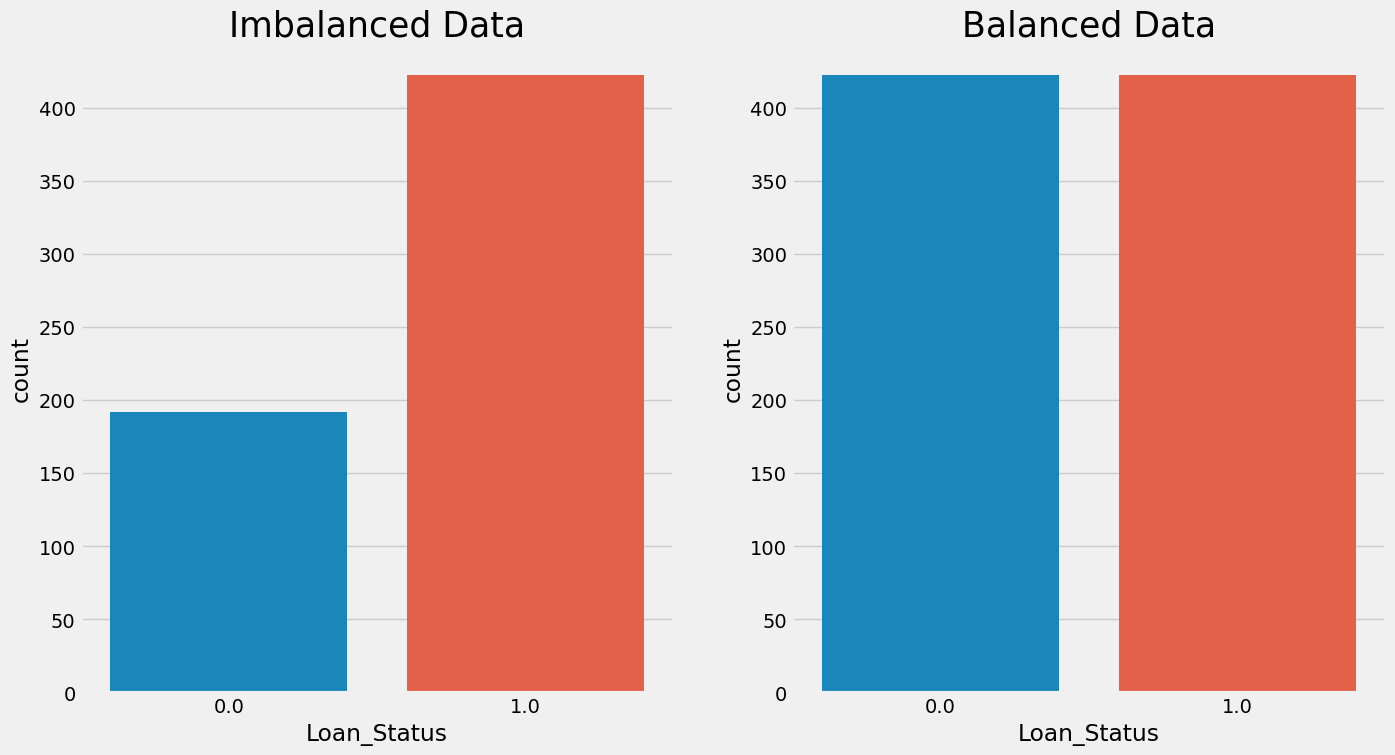

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=25)
plt.subplot(1,2,2)
sns.countplot(y_new['Loan_Status'])
plt.title("Balanced Data",fontsize=25)

# Checking Skewness:

In [ ]:
X_new.skew()

Gender              -1.644644
Married             -0.539699
Dependents           1.188953
Education            1.232360
Self_Employed        2.189560
ApplicantIncome      2.317533
CoapplicantIncome    1.285178
LoanAmount           1.814613
Loan_Amount_Term    -2.125274
Credit_History      -1.325004
Property_Area       -0.056966
dtype: float64

Remarks: We see that there is skewness in our data.

# Removing skewness:

In [ ]:
#using power transform method to remove skewness
from sklearn.preprocessing import power_transform
X_new=power_transform(X_new,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

In [ ]:
#checking skewness after removal
X_new.skew()

Gender              -1.408679
Married             -0.497079
Dependents           0.565957
Education            1.042668
Self_Employed        1.927853
ApplicantIncome     -0.016441
CoapplicantIncome   -0.090551
LoanAmount           0.002853
Loan_Amount_Term     0.395909
Credit_History      -1.135653
Property_Area       -0.151233
dtype: float64

Remarks: We have successfully reduced skewness from our data.

# Feature Scaling:

In [ ]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=x.columns)

Remarks: We are scaling the feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value..

# Splitting data for model building using train test split :

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

# Finding the best model:

In [ ]:
models={
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "XGBRegressor":XGBClassifier(),
    "LIGHTGBM":LGBMClassifier()
}

*************************************************** GradientBoostingClassifier ************************************************************


Accuracy_Score 0.7952755905511811


SCORE 0.7952755905511811


Confusion metrics


[[ 93  43]
 [  9 109]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.91      0.68      0.78       136
         1.0       0.72      0.92      0.81       118

    accuracy                           0.80       254
   macro avg       0.81      0.80      0.79       254
weighted avg       0.82      0.80      0.79       254

Cross_Val_Score 0.8281980839673148


ROC AUC CURVE


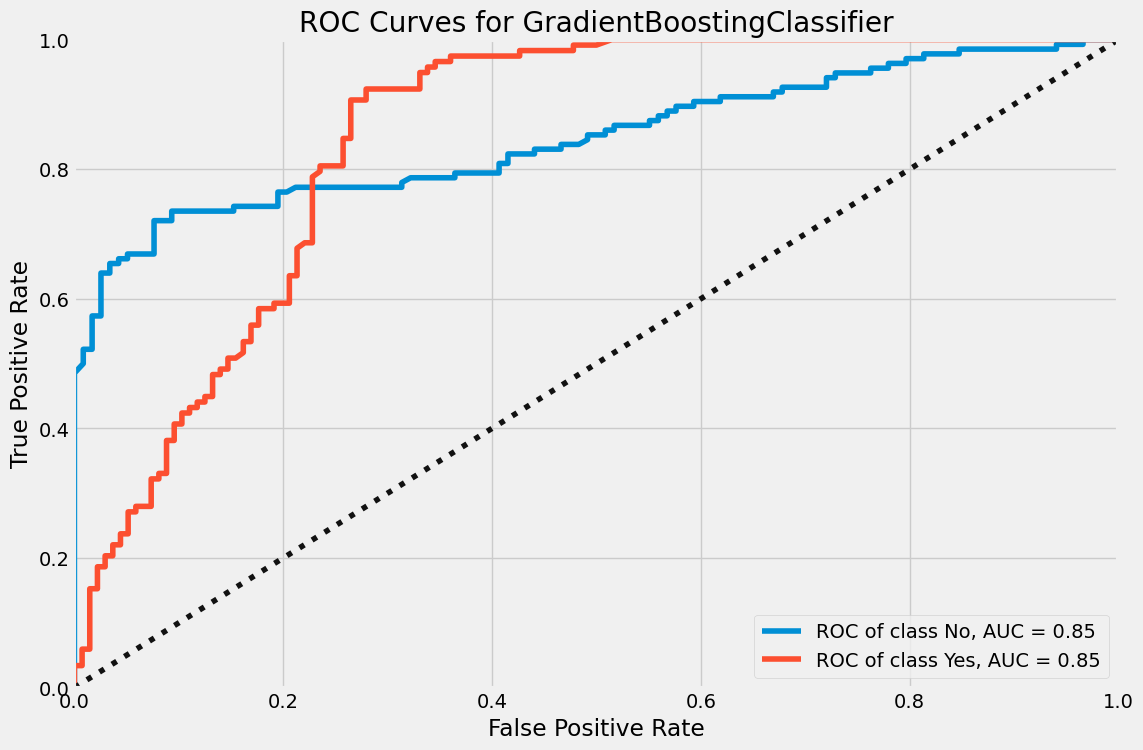

MODEL LEARNING CURVE


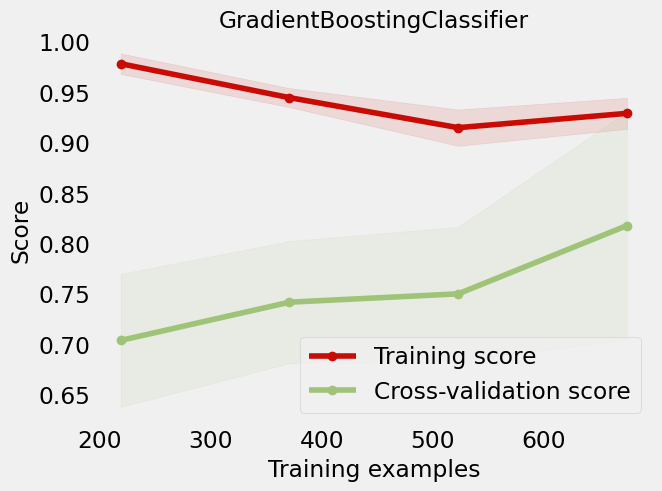

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.8070866141732284


SCORE 0.8070866141732284


Confusion metrics


[[100  36]
 [ 13 105]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80       136
         1.0       0.74      0.89      0.81       118

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.82      0.81      0.81       254

Cross_Val_Score 0.8211045364891518


ROC AUC CURVE


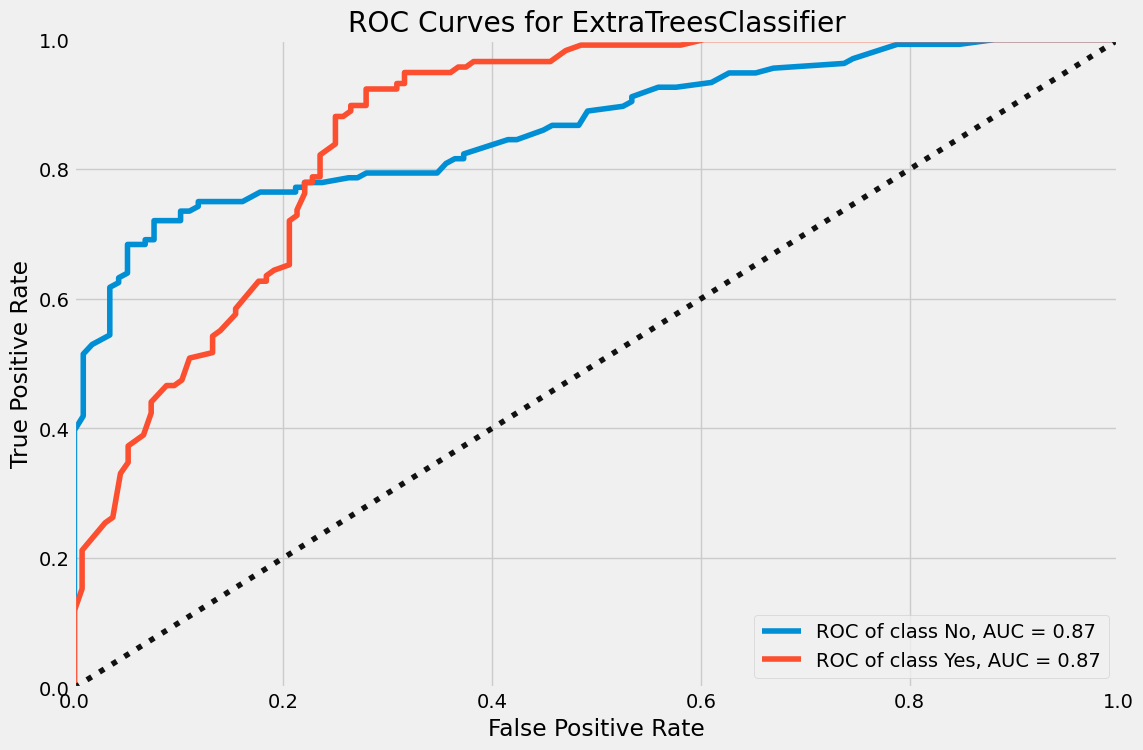

MODEL LEARNING CURVE


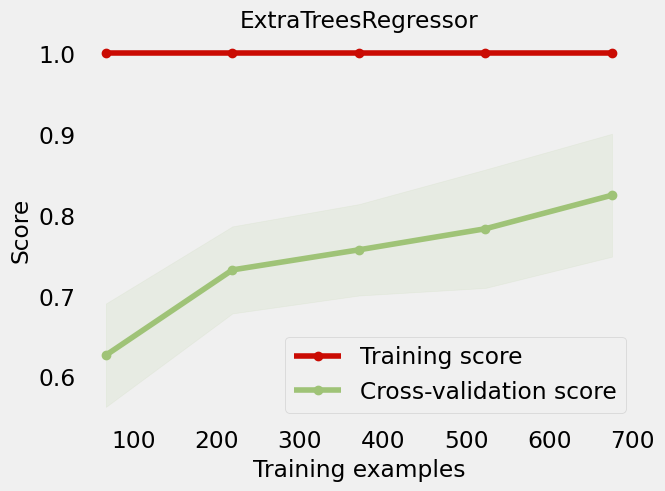

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.8149606299212598


SCORE 0.8149606299212598


Confusion metrics


[[100  36]
 [ 11 107]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.90      0.74      0.81       136
         1.0       0.75      0.91      0.82       118

    accuracy                           0.81       254
   macro avg       0.82      0.82      0.81       254
weighted avg       0.83      0.81      0.81       254

Cross_Val_Score 0.8400042265426881


ROC AUC CURVE


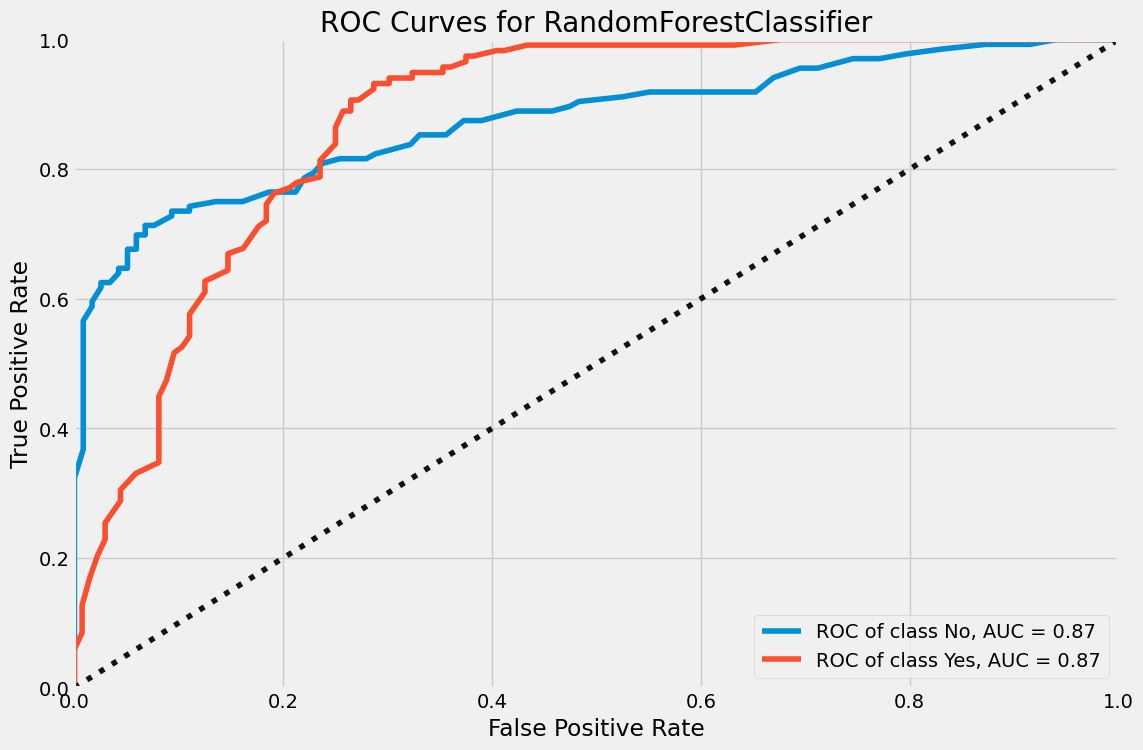

MODEL LEARNING CURVE


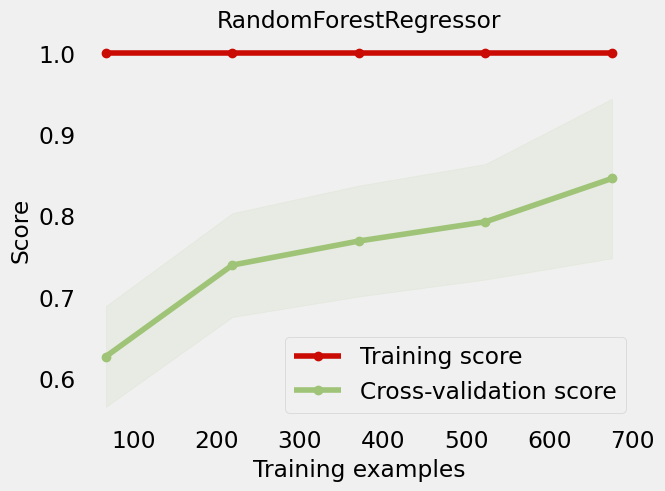

*************************************************** XGBRegressor ************************************************************
[03:59:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy_Score 0.8070866141732284


SCORE 0.8070866141732284


Confusion metrics


[[103  33]
 [ 16 102]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81       136
         1.0       0.76      0.86      0.81       118

    accuracy                           0.81       254
   macro avg       0.81      0.81      0.81       254
weighted avg       0.81      0.81      0.81       254

[03:59:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Sta

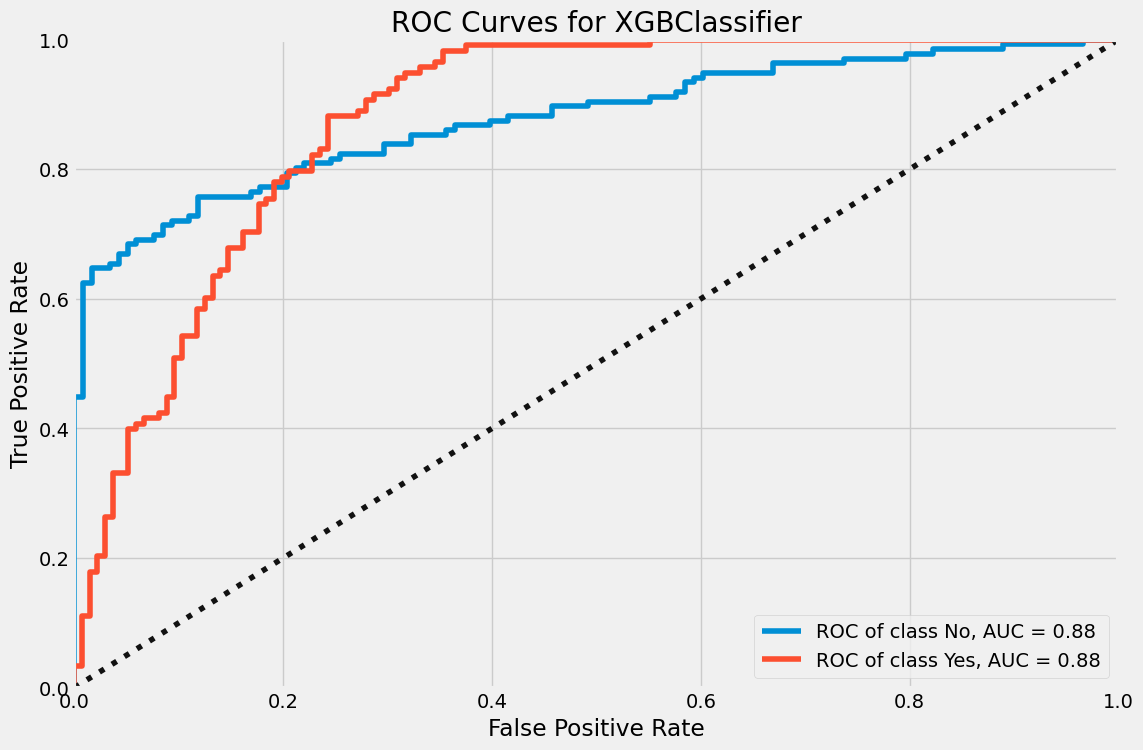

MODEL LEARNING CURVE
[03:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:59:51] WARNING: C:/Users/Administrator/worksp

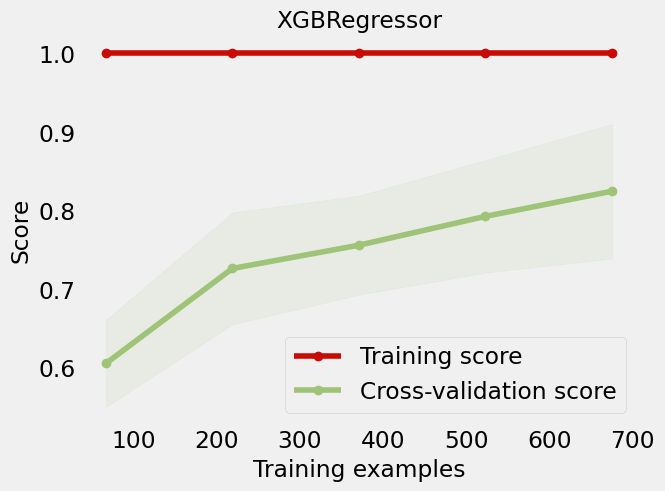

*************************************************** LIGHTGBM ************************************************************


Accuracy_Score 0.7874015748031497


SCORE 0.7874015748031497


Confusion metrics


[[ 99  37]
 [ 17 101]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.85      0.73      0.79       136
         1.0       0.73      0.86      0.79       118

    accuracy                           0.79       254
   macro avg       0.79      0.79      0.79       254
weighted avg       0.80      0.79      0.79       254

Cross_Val_Score 0.8234009580163427


ROC AUC CURVE


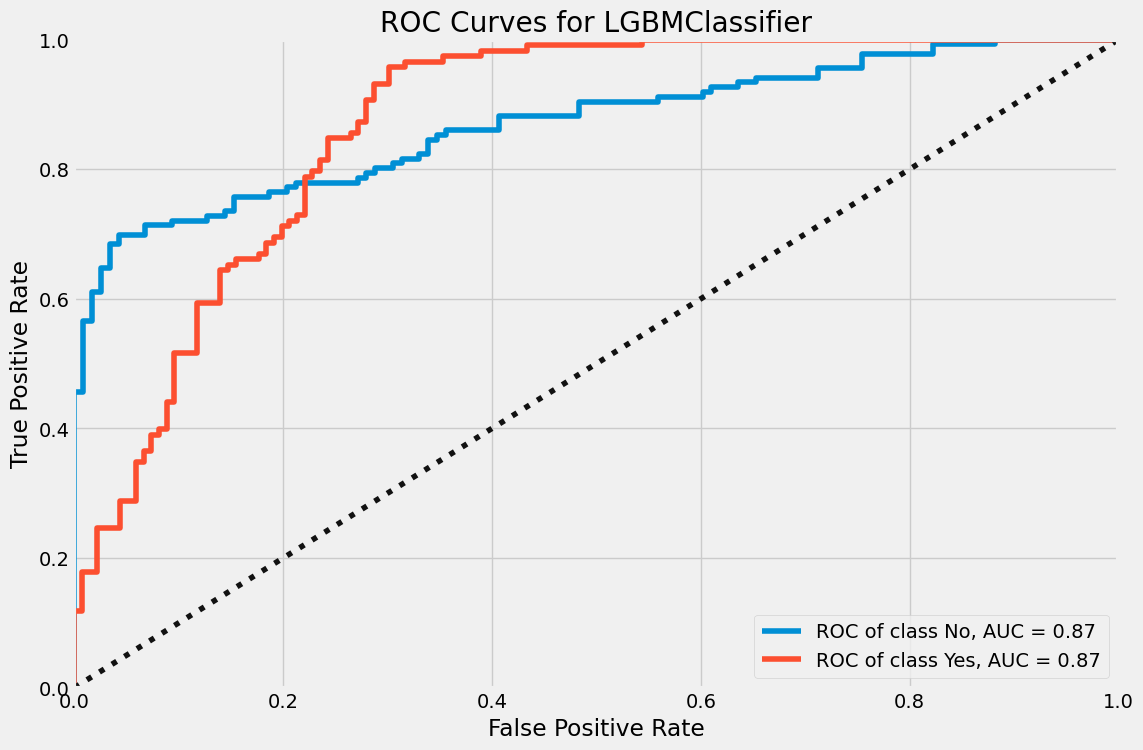

MODEL LEARNING CURVE


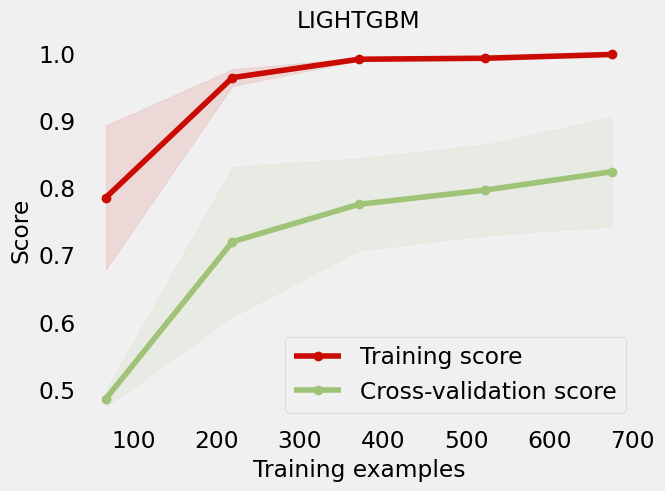

In [ ]:
skf=StratifiedKFold(n_splits=5,shuffle=True) #using stratifiedkfold here because it selects all classes at equal level
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_new,y_new,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  print("ROC AUC CURVE")
  plt.figure(figsize=(12,8))
  roc_auc(model,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

# Remarks: 
We are selecting RandomForestClassifier as our best model since it is giving good cross_val_score of 0.84 as compared to other models.

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter tuning our best ML model:¶

In [ ]:
param={'bootstrap': [True,False],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_features': ['auto','sqrt','log2'],
 'max_samples': [None,1,2],
 'min_samples_leaf': [1,2],
 'min_samples_split': [2,1,3]
}

In [ ]:
Grid=GridSearchCV(estimator=rf,param_grid=param,cv=skf,n_jobs=-1)

Remarks: Using the Grid Search CV method for hyperparameter tuning of the best model.

In [ ]:
Grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_samples': [None, 1, 2],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 1, 3]})

Remarks: We have trained the Grid Search CV with the list of parameters we think it should check for best possible outcomes.

In [ ]:
Grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_samples': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [ ]:
Grid.best_score_

0.8578684136376445

# Remarks:
After successfully incorporating the Hyper Parameter Tuning on the Final Model we received the accuracy score for it i.e., 85.78% which was previously 84%.

In [ ]:
RF=RandomForestClassifier(bootstrap= True,
 criterion= 'entropy',
 max_depth= None,
 max_features= 'sqrt',
 max_samples= None,
 min_samples_leaf= 2,
 min_samples_split= 2)

Remarks: In the above cell, we have put all the values of grid in randomforest to plot roc_auc and to see learning curve.

ROC AUC CURVE


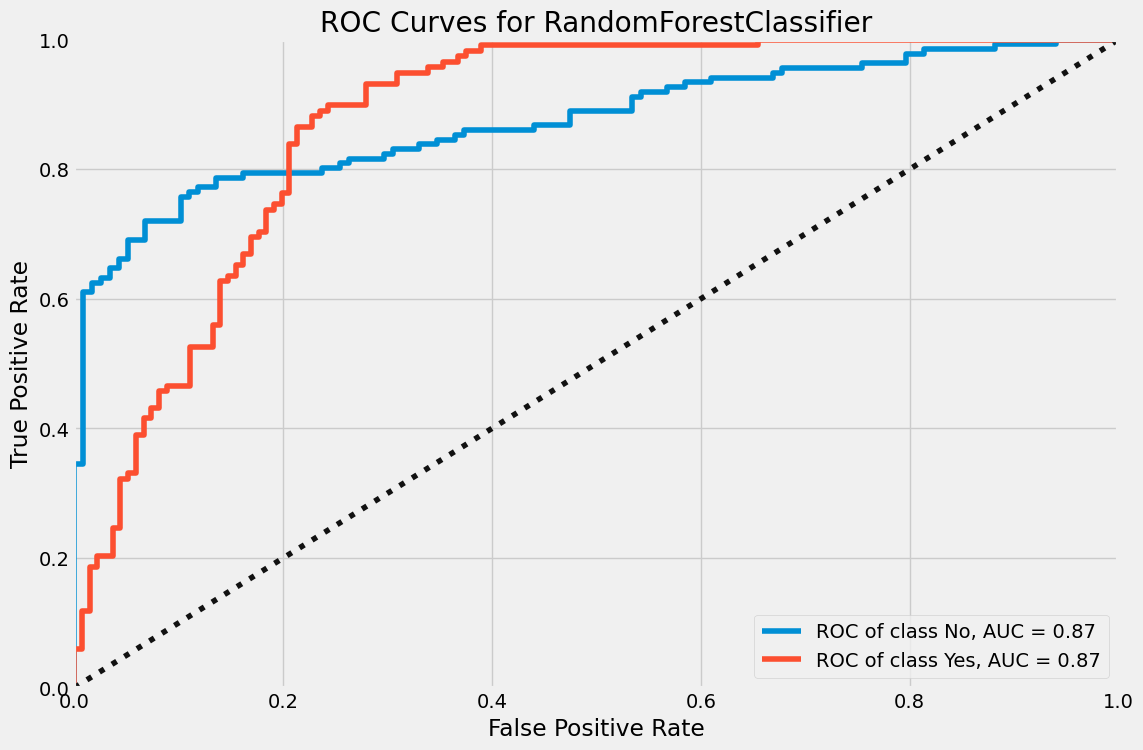

MODEL LEARNING CURVE


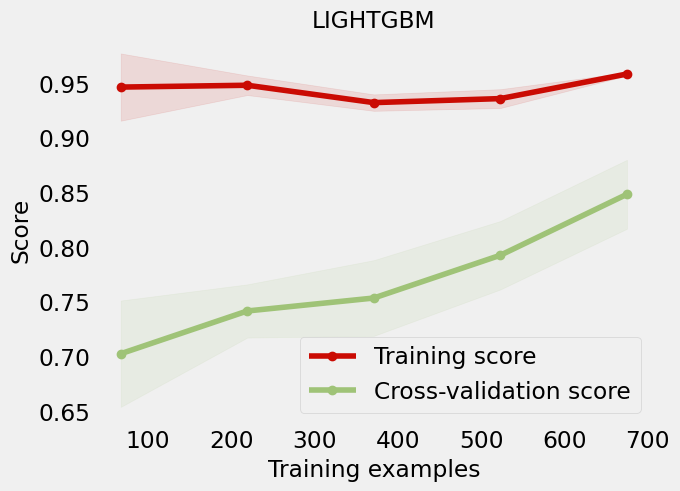

In [ ]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(RF,X_train,y_train,X_test=X_test,y_test=y_test,classes=['No','Yes'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(RF,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

Remarks: We have generated the ROC Curve for the final model and it shows the AUC score for the final model to be of 87% for both Yes or No class.

# Final Model Metrics:

In [ ]:
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
print("Accuracy_score",accuracy_score(y_test,y_pred))
print("Confusion Matrics")
print('\n')
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Accuracy_score 0.8070866141732284
Confusion Matrics


[[ 95  41]
 [  8 110]]
Classification Report


              precision    recall  f1-score   support

         0.0       0.92      0.70      0.79       136
         1.0       0.73      0.93      0.82       118

    accuracy                           0.81       254
   macro avg       0.83      0.82      0.81       254
weighted avg       0.83      0.81      0.81       254



# Saving the model:

In [ ]:
import joblib
joblib.dump(Grid,'Loan_Classification_Model.obj')

['Loan_Classification_Model.obj']

# Loading the model:

In [ ]:
model=joblib.load('Loan_Classification_Model.obj')

In [ ]:
model.predict(X_test)

array([1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

# Conclusion:

1. In the given dataset, we were required to build a model that can predict the the loan_status like loan should be approved or not.


2. After some initial data analysis, we performed EDA to understand the effect of features on the target column and to understand other related important things


3. The data was imbalanced so to balance it, we used upsampling SMOTE method.


4. The dataset was very small. If the dataset was large, we could have learn more about the model and accuracy might have increased.


5. In the end, we build a ML model i.e., RandomForestClassifier that was able predict loan status with 85.78% accuracy.